# Comparing methods of hurricane forecast uncertainty
##### author: Elizabeth A. Barnes, Randal J. Barnes and Mark DeMaria

In [1]:
import datetime
import os
import pickle
import pprint
import time

import experiment_settings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from build_data import build_hurricane_data
import build_model
from model_diagnostics import plot_history
from save_model_run import save_model_run
from sklearn import preprocessing
from training_instrumentation import TrainingInstrumentation
from silence_tensorflow import silence_tensorflow
import tensorflow_probability as tfp

silence_tensorflow()

In [2]:
__author__ = "Randal J Barnes and Elizabeth A. Barnes"
__version__ = "v0.3.0, 17 March 2022"

EXP_NAME_LIST = (
    # "intensity1_AL48",
    # "intensity2_AL72",
    # "intensity3_AL96",    
    # "intensity4_EPCP48",
    # "intensity5_EPCP24",    
    "intensity201_AL24",        
    # "intensity5_EPCP72",
    # "intensity6_EPCP96",       
    # "intensity41_EPCP48",
    # "intensity42_EPCP48",   
)

OVERWRITE_MODEL = False
DATA_PATH = "data/"
MODEL_PATH = "saved_models/"

In [3]:
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## Start looping through runs

years(2013,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (118, 3),
 'onehot_train_shape': (1985, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (118, 11),
 'x_train_shape': (1985, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2013_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 2093.
Epoch 02343: early stopping
{'best_epoch': 2092,
 'elapsed_time': 126.4285409450531,
 'loss_train': 3.49438738822937,
 'loss_valid': 3.660245895385742,
 'network_seed': 416}


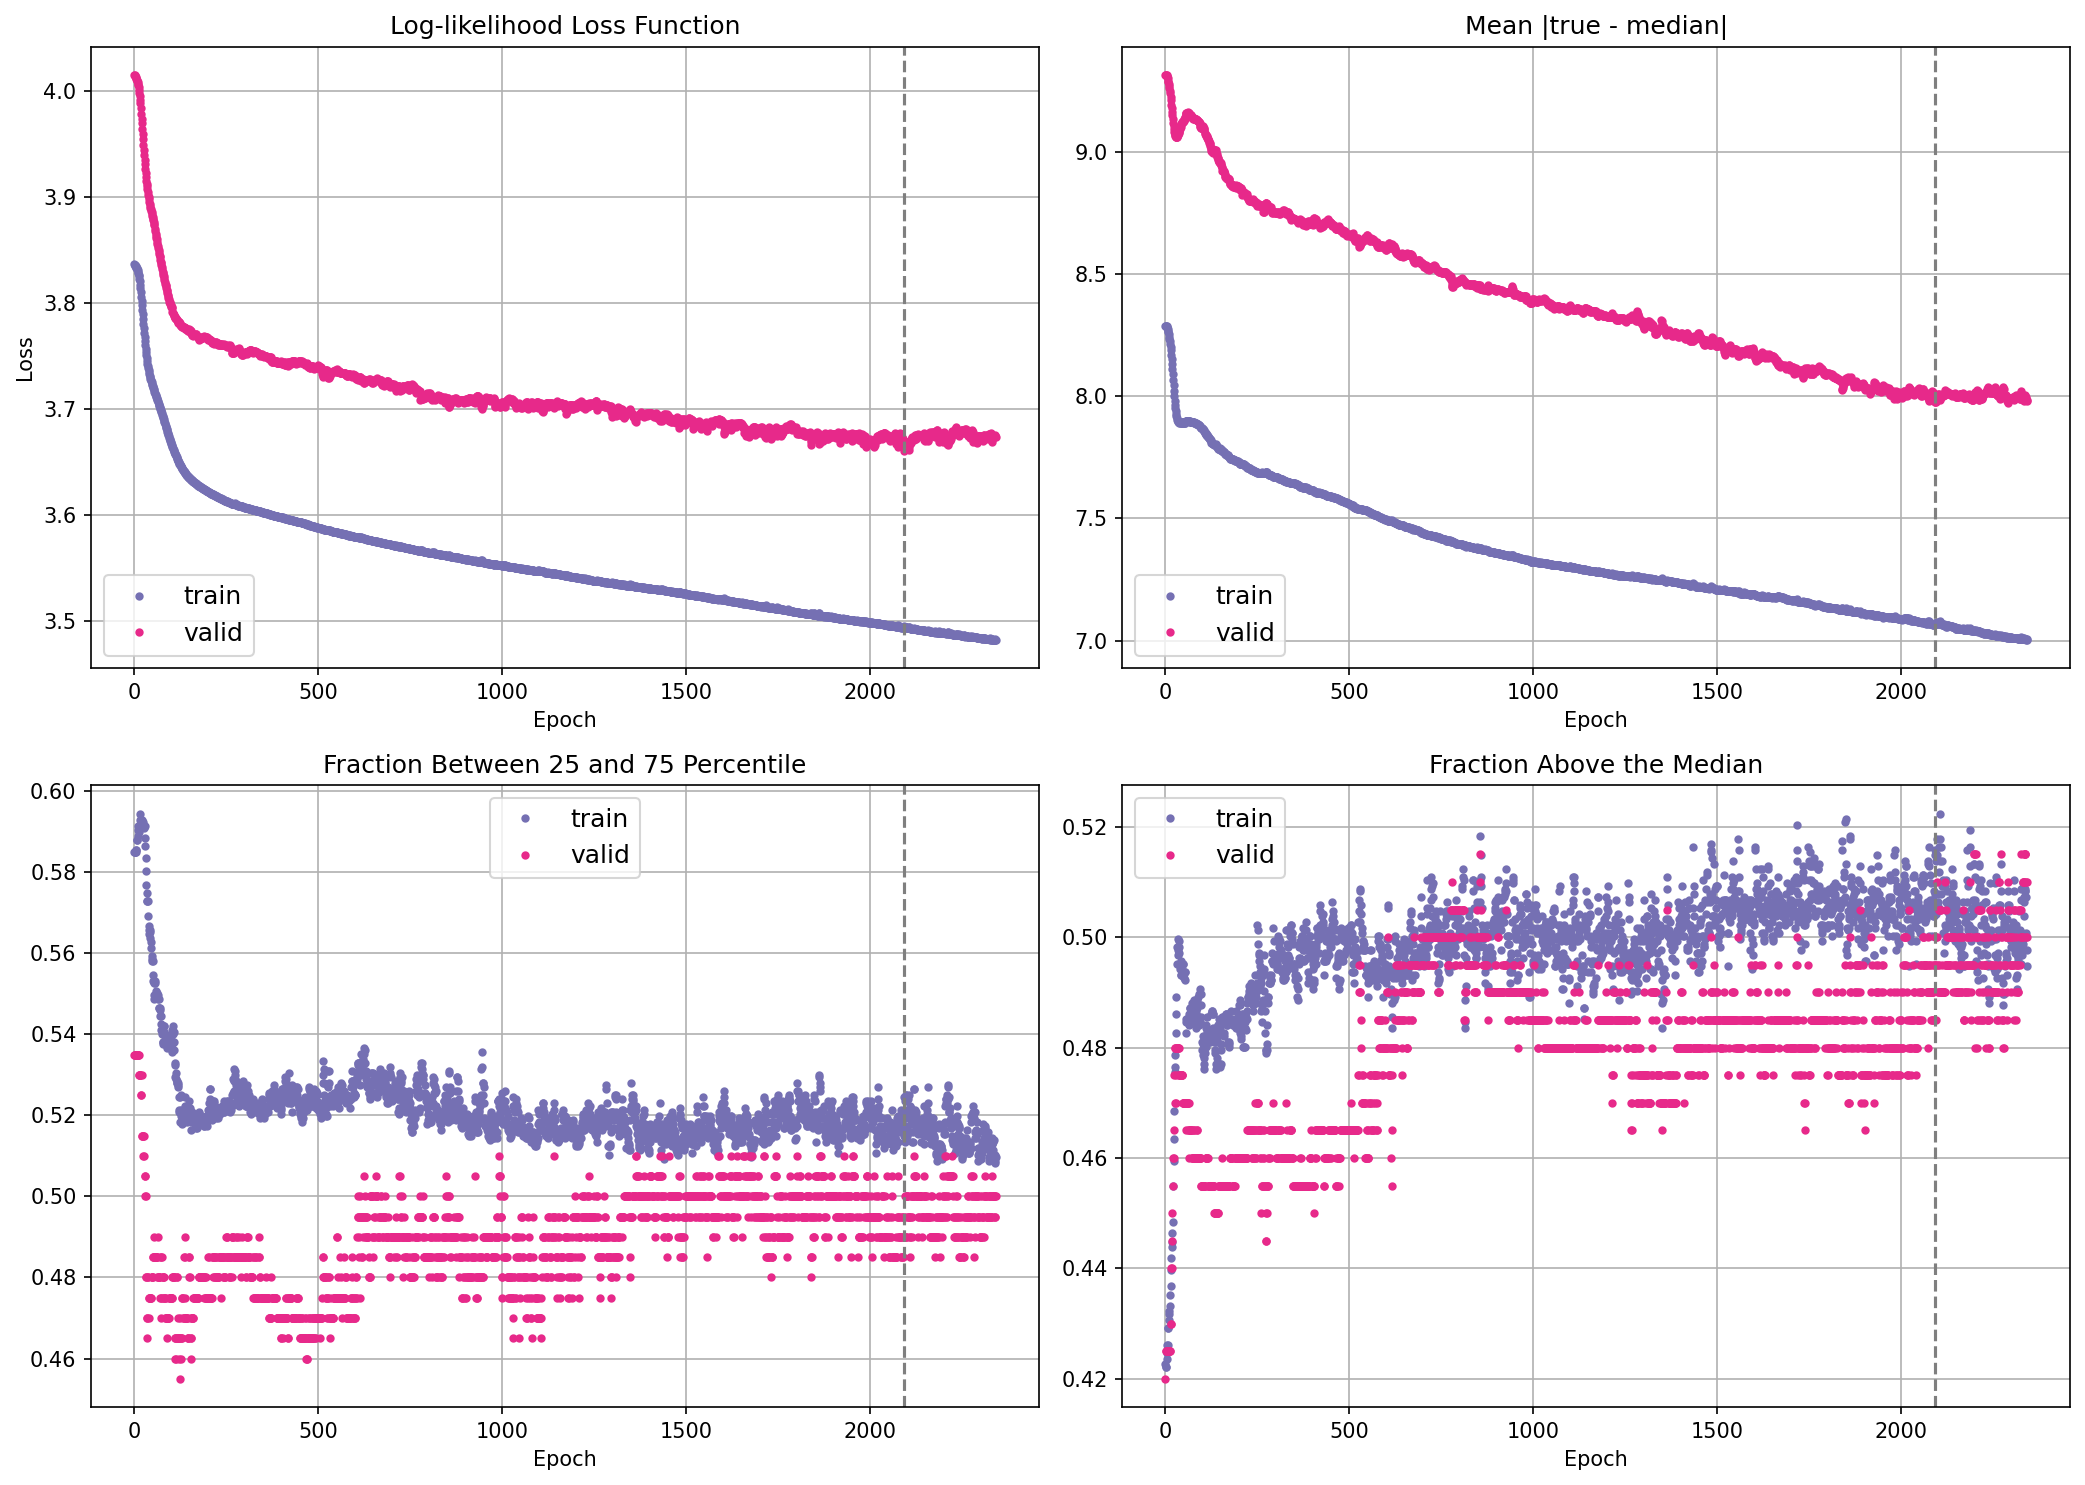

years(2013,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (118, 3),
 'onehot_train_shape': (1985, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (118, 11),
 'x_train_shape': (1985, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2013_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 561.
Epoch 00811: early stopping
{'best_epoch': 560,
 'elapsed_time': 45.60277080535889,
 'loss_train': 3.594968795776367,
 'loss_valid': 3.6368966102600098,
 'network_seed': 739}


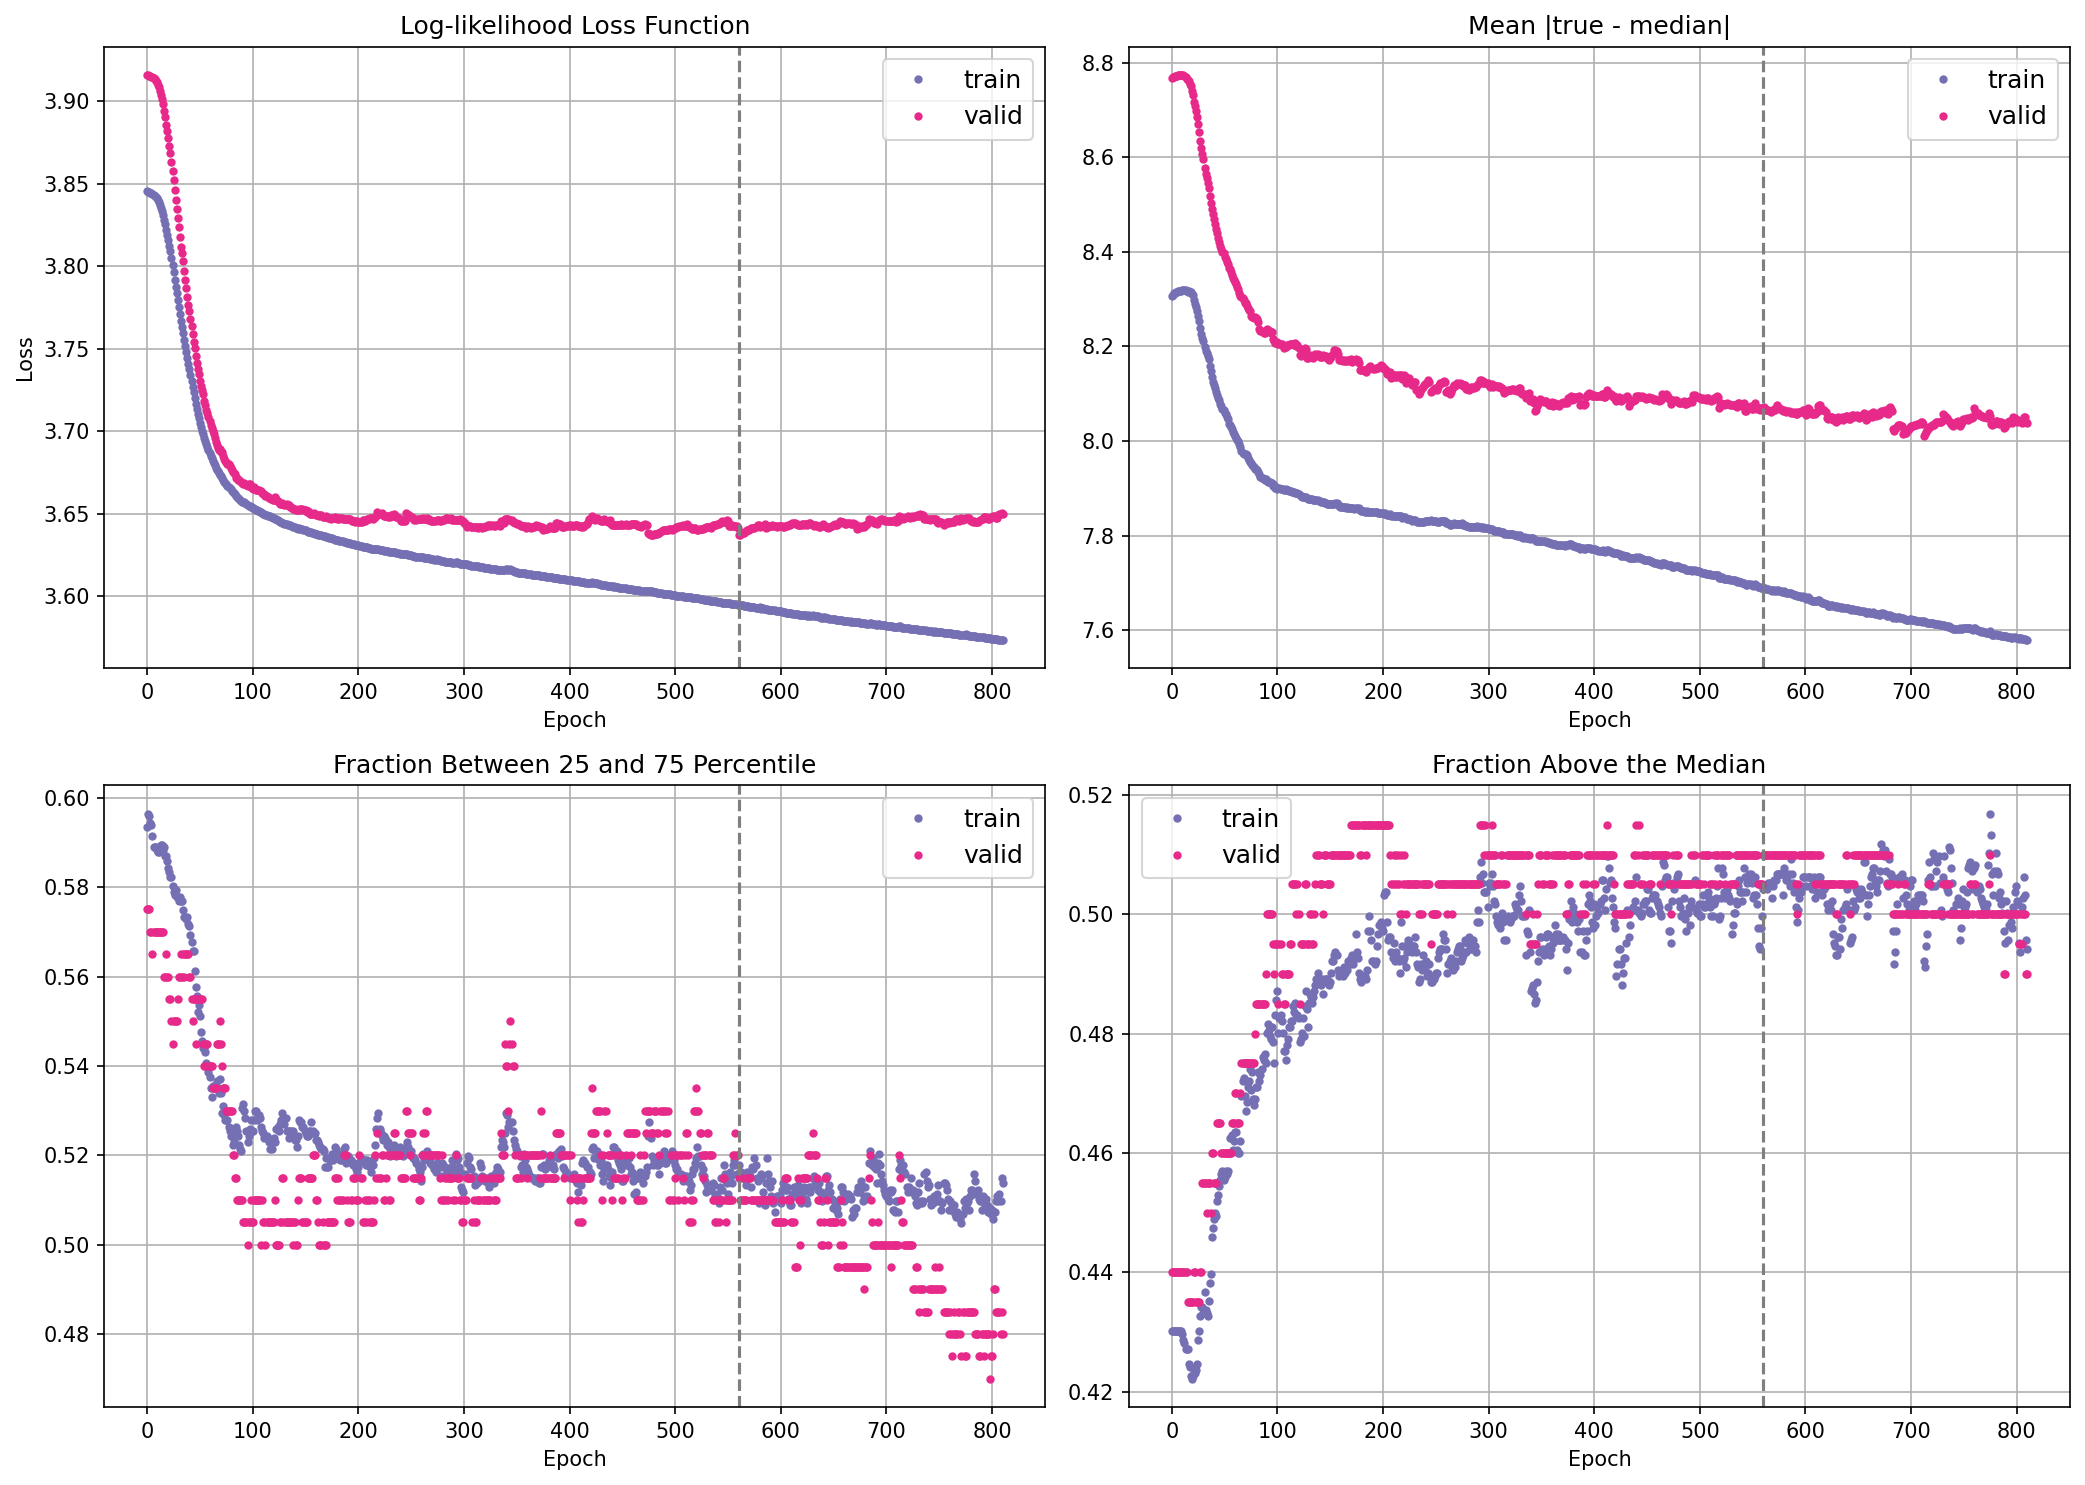

years(2014,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (112, 3),
 'onehot_train_shape': (1991, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (112, 11),
 'x_train_shape': (1991, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2014_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 1580.
Epoch 01830: early stopping
{'best_epoch': 1579,
 'elapsed_time': 117.82752513885498,
 'loss_train': 3.50188946723938,
 'loss_valid': 3.650491952896118,
 'network_seed': 416}


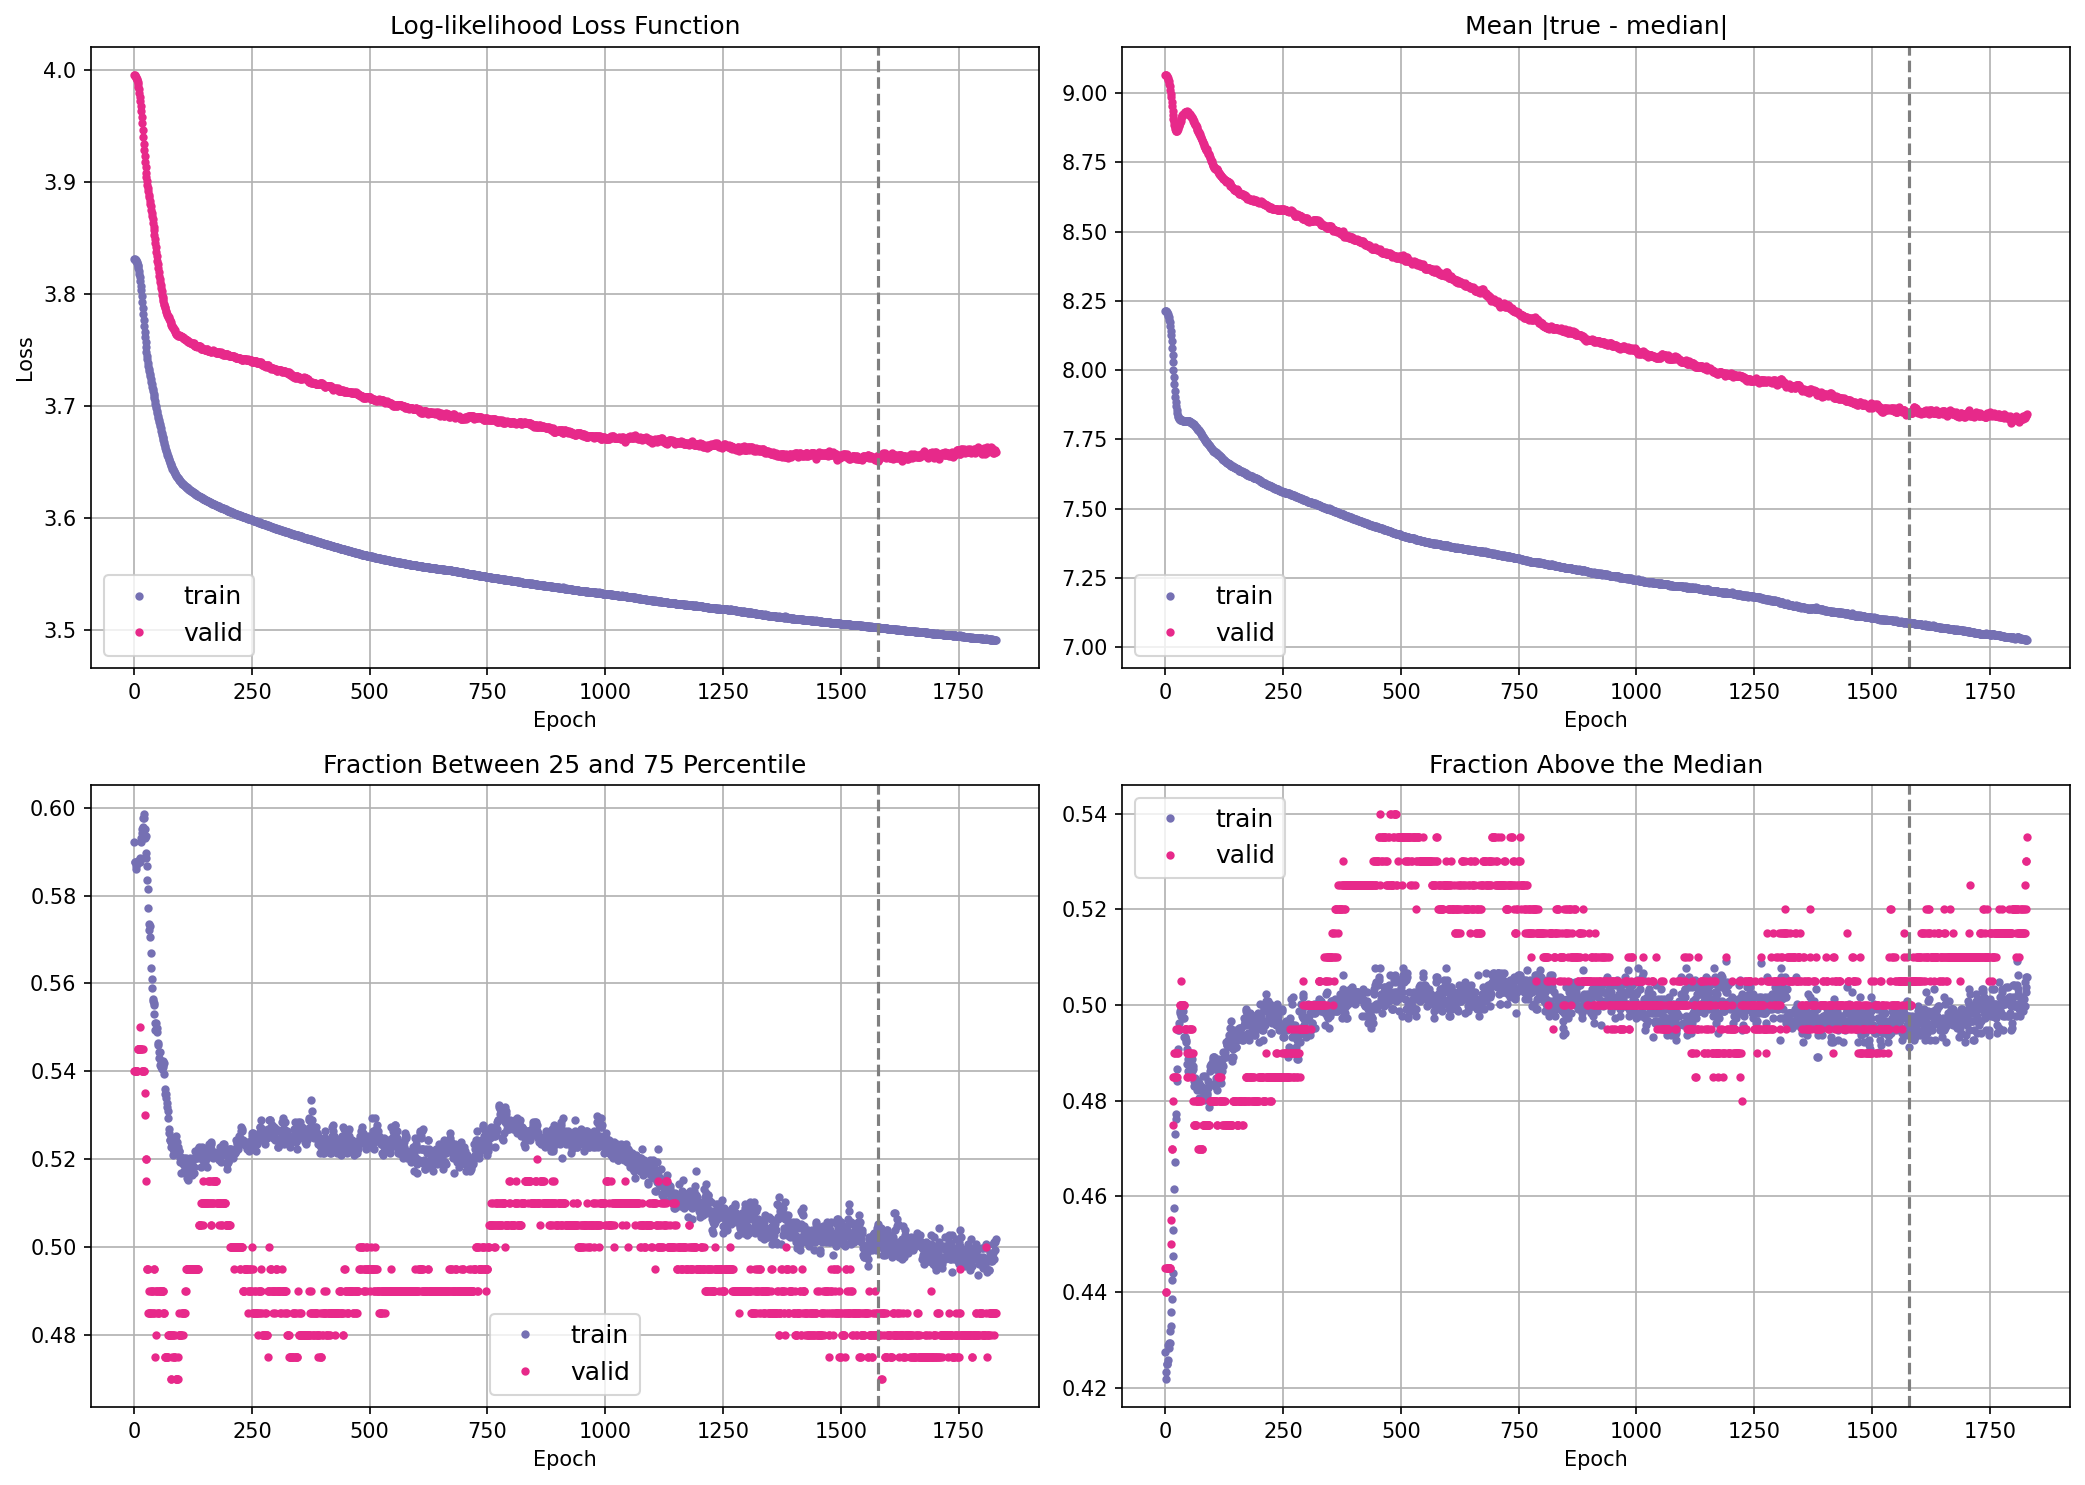

years(2014,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (112, 3),
 'onehot_train_shape': (1991, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (112, 11),
 'x_train_shape': (1991, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2014_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 170.
Epoch 00420: early stopping
{'best_epoch': 169,
 'elapsed_time': 34.11422109603882,
 'loss_train': 3.6234006881713867,
 'loss_valid': 3.6368441581726074,
 'network_seed': 739}


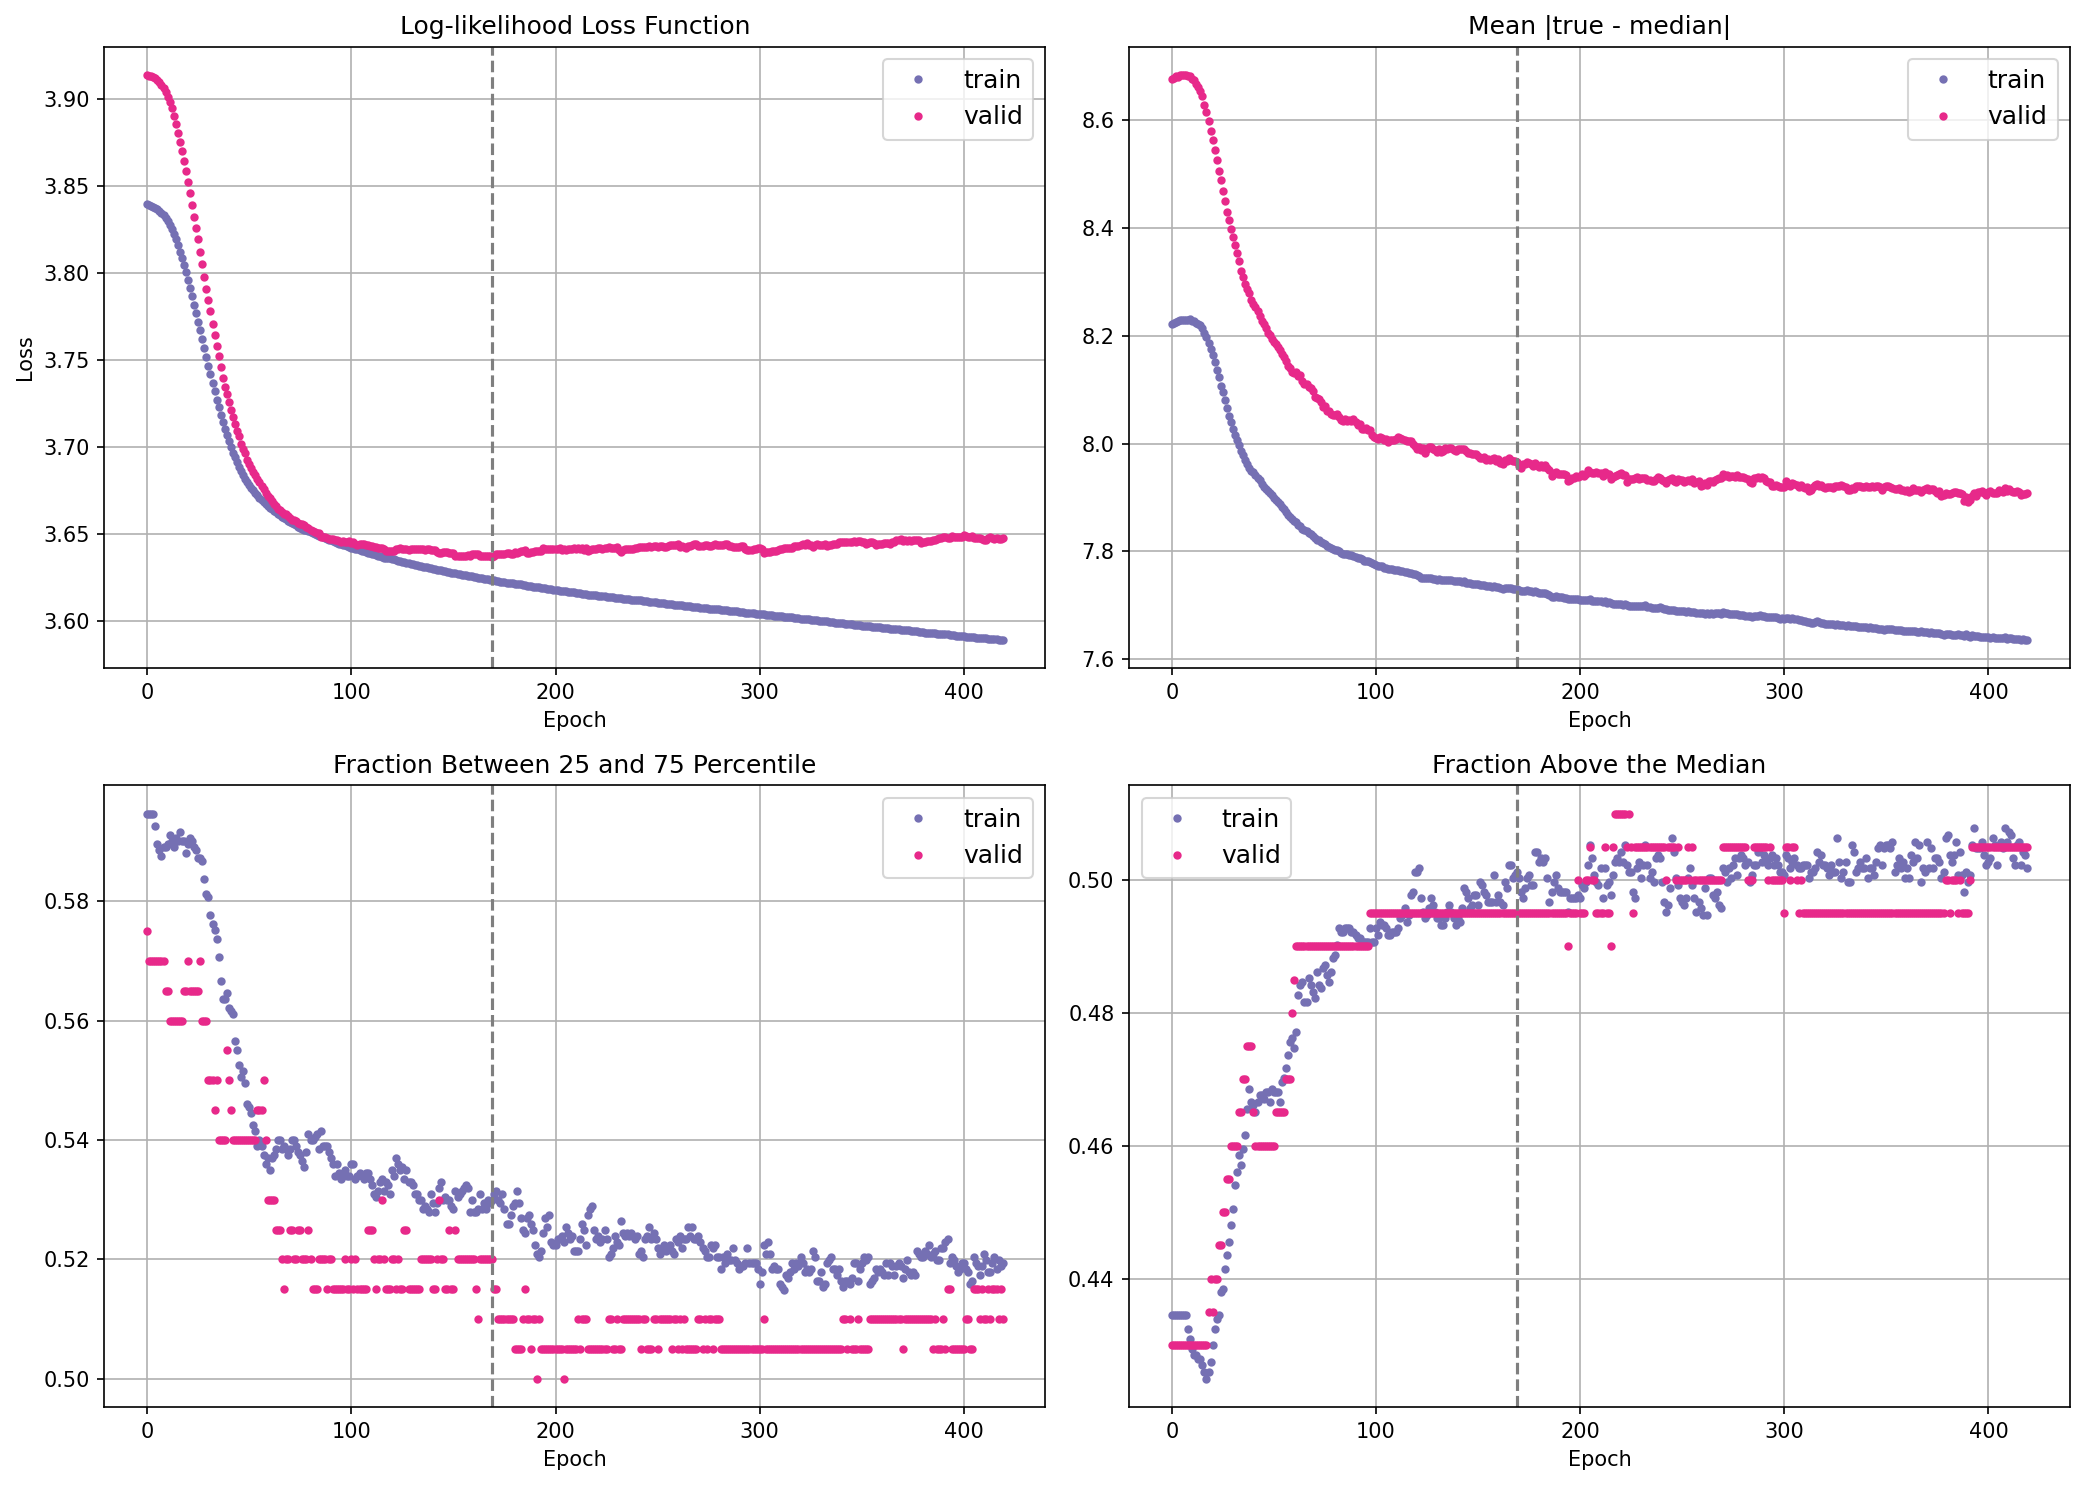

years(2015,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (170, 3),
 'onehot_train_shape': (1933, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (170, 11),
 'x_train_shape': (1933, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2015_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 1629.
Epoch 01879: early stopping
{'best_epoch': 1628,
 'elapsed_time': 120.02030110359192,
 'loss_train': 3.4898793697357178,
 'loss_valid': 3.612607955932617,
 'network_seed': 416}


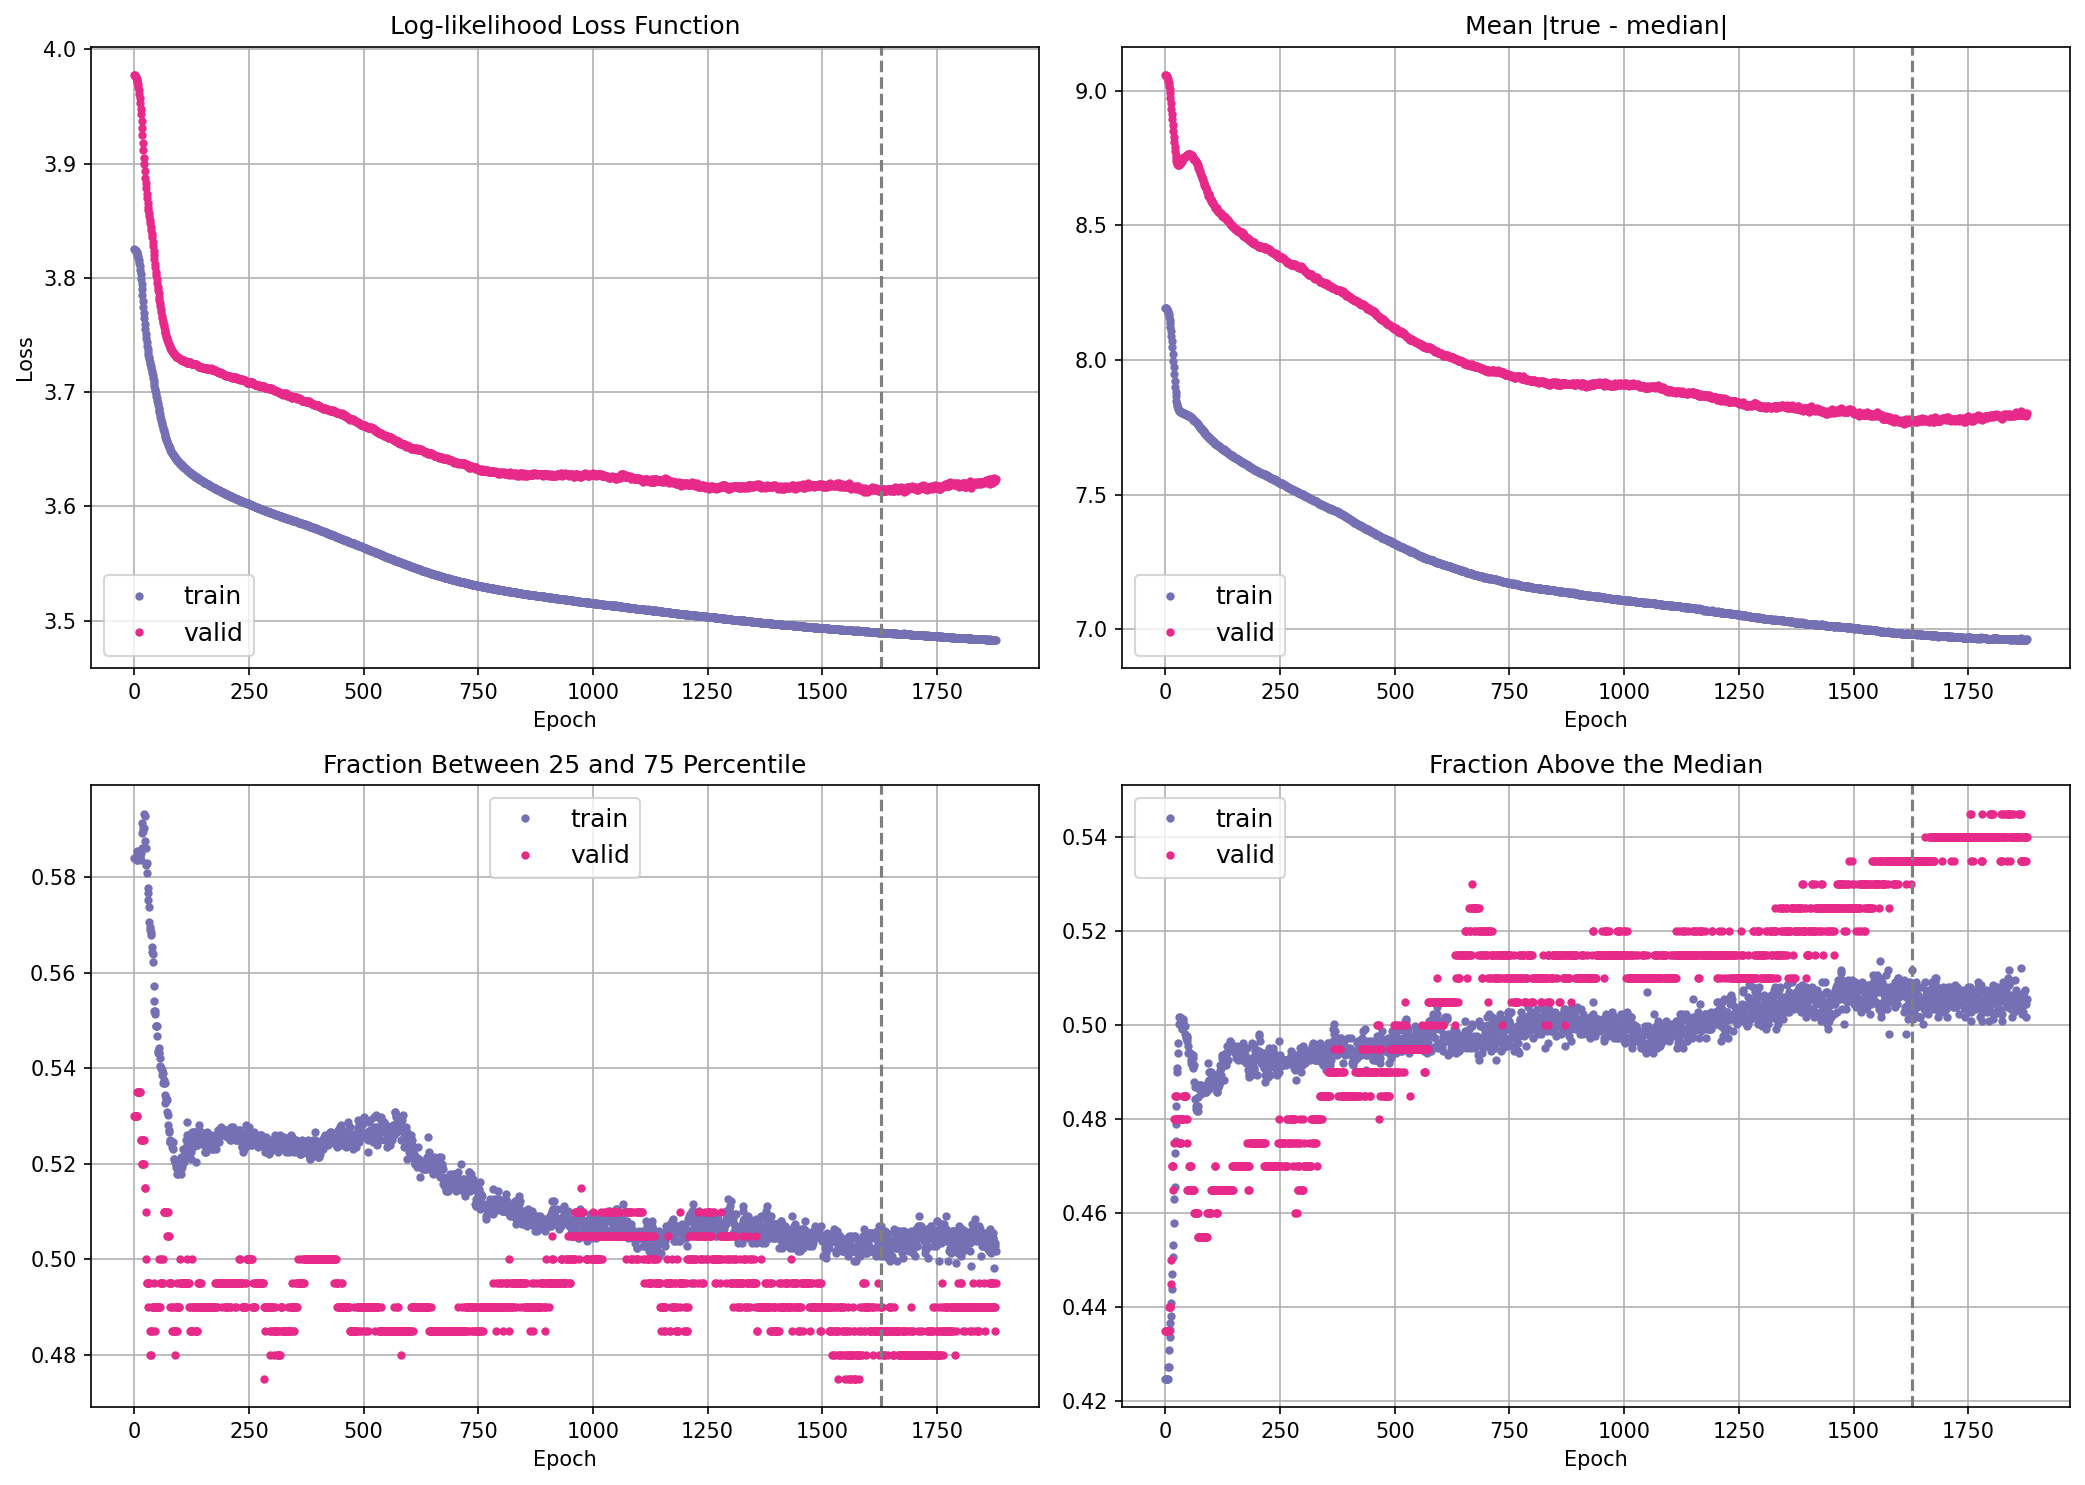

years(2015,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (170, 3),
 'onehot_train_shape': (1933, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (170, 11),
 'x_train_shape': (1933, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2015_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 333.
Epoch 00583: early stopping
{'best_epoch': 332,
 'elapsed_time': 44.59119200706482,
 'loss_train': 3.5916895866394043,
 'loss_valid': 3.6361875534057617,
 'network_seed': 739}


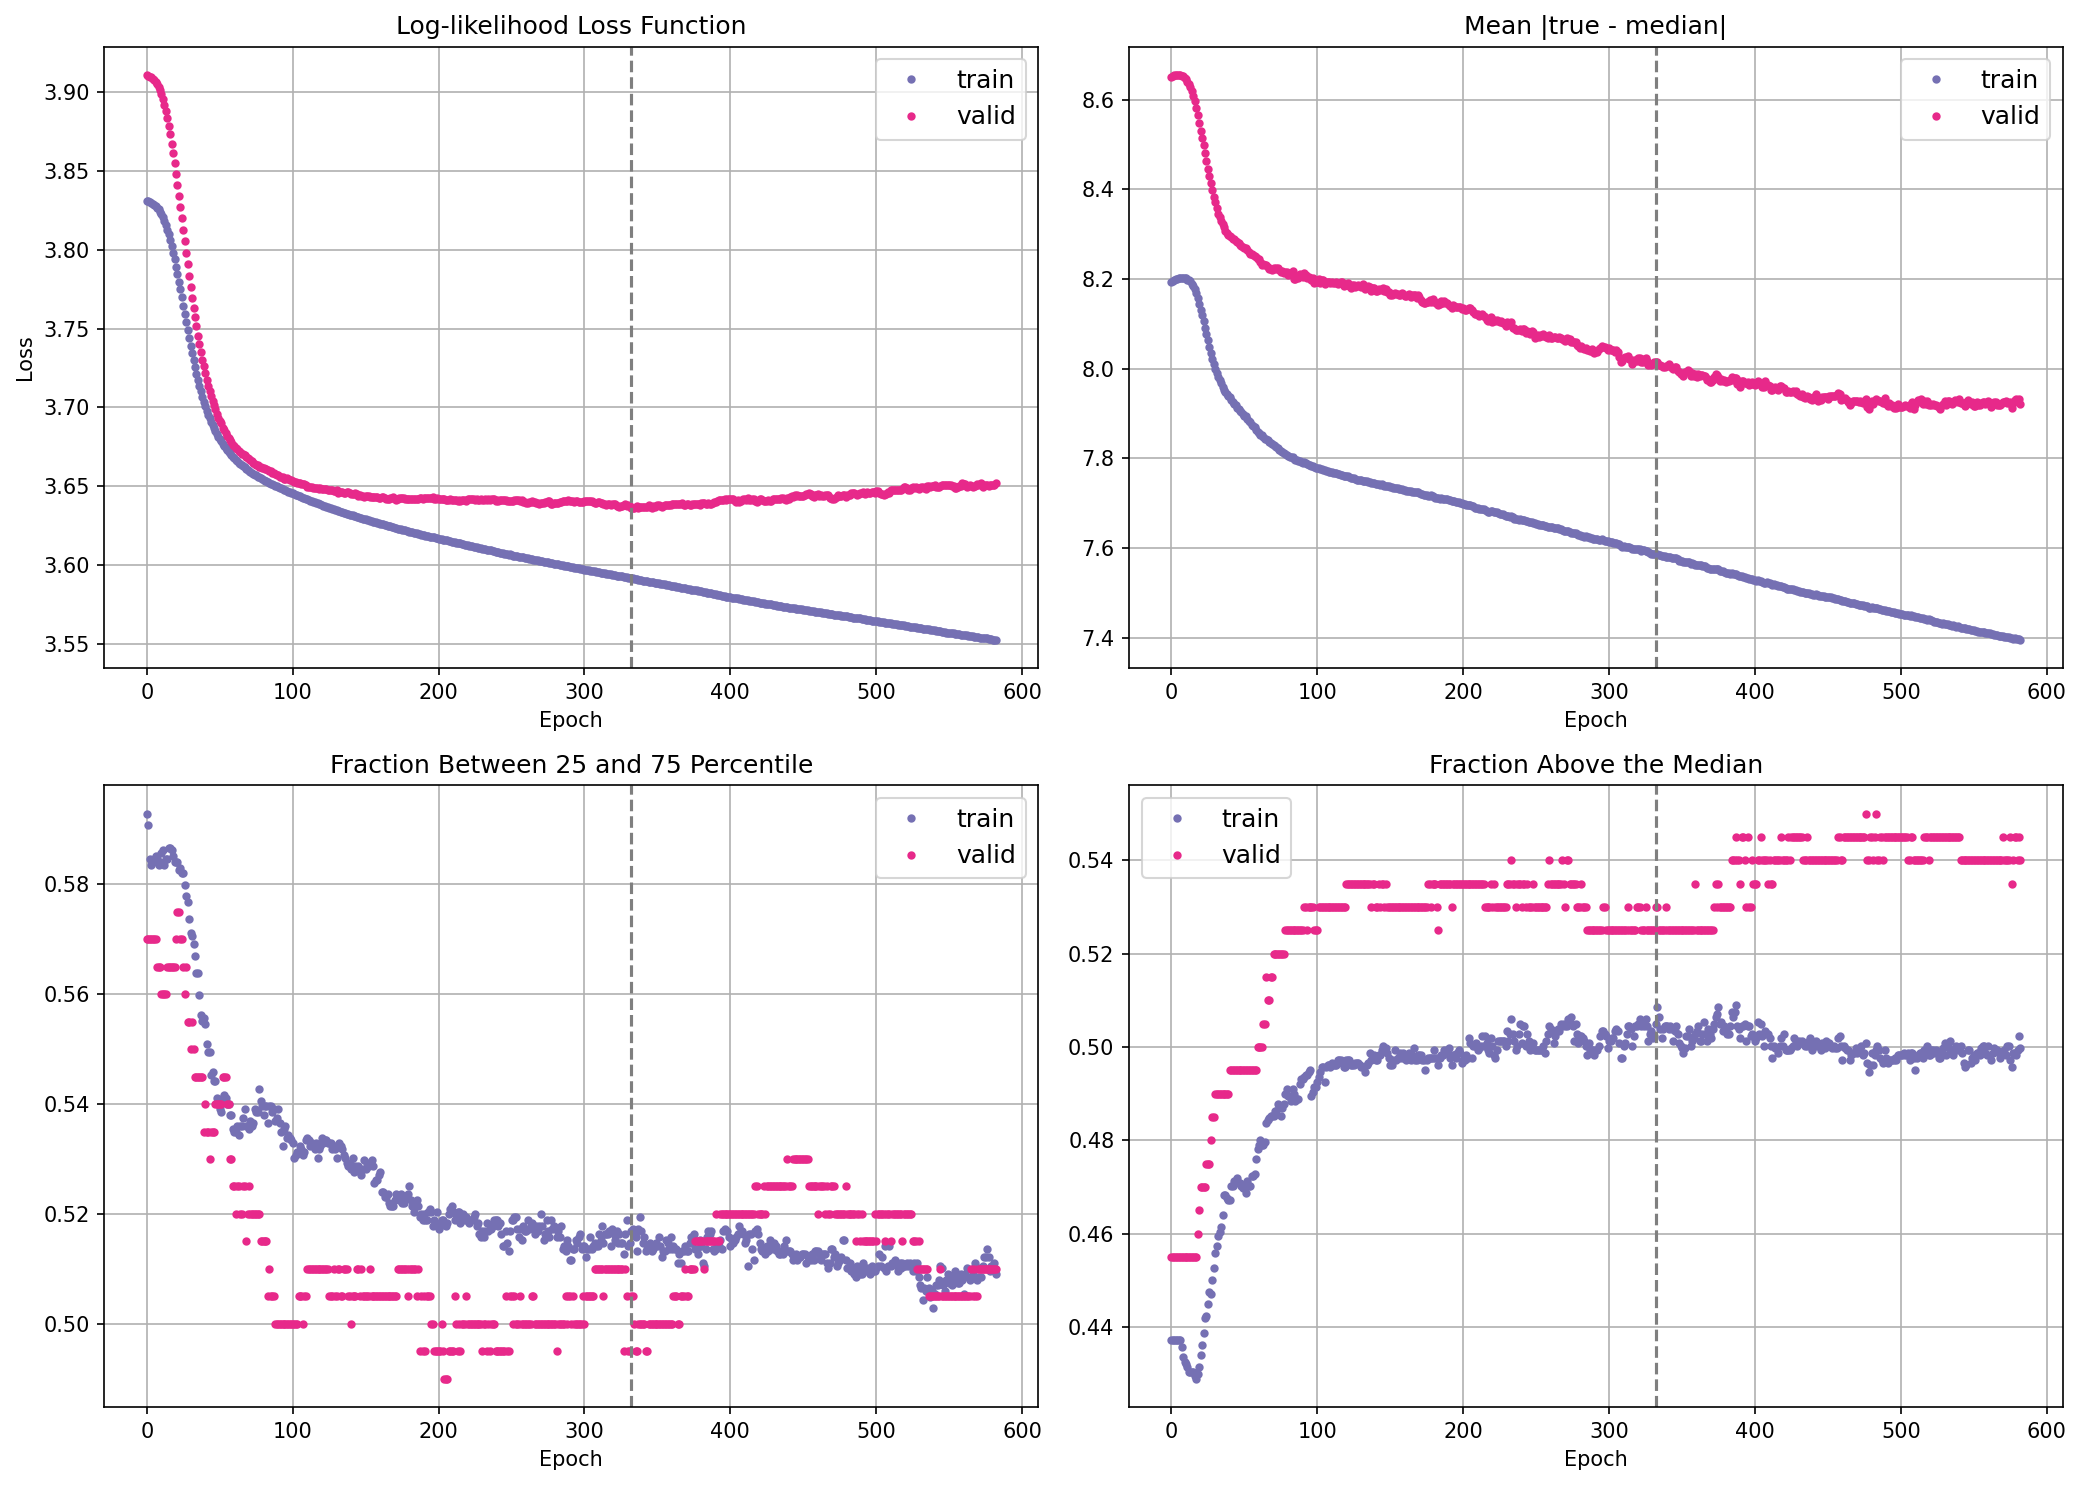

years(2016,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (281, 3),
 'onehot_train_shape': (1822, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (281, 11),
 'x_train_shape': (1822, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2016_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 1417.
Epoch 01667: early stopping
{'best_epoch': 1416,
 'elapsed_time': 106.37671136856079,
 'loss_train': 3.4730470180511475,
 'loss_valid': 3.6636078357696533,
 'network_seed': 416}


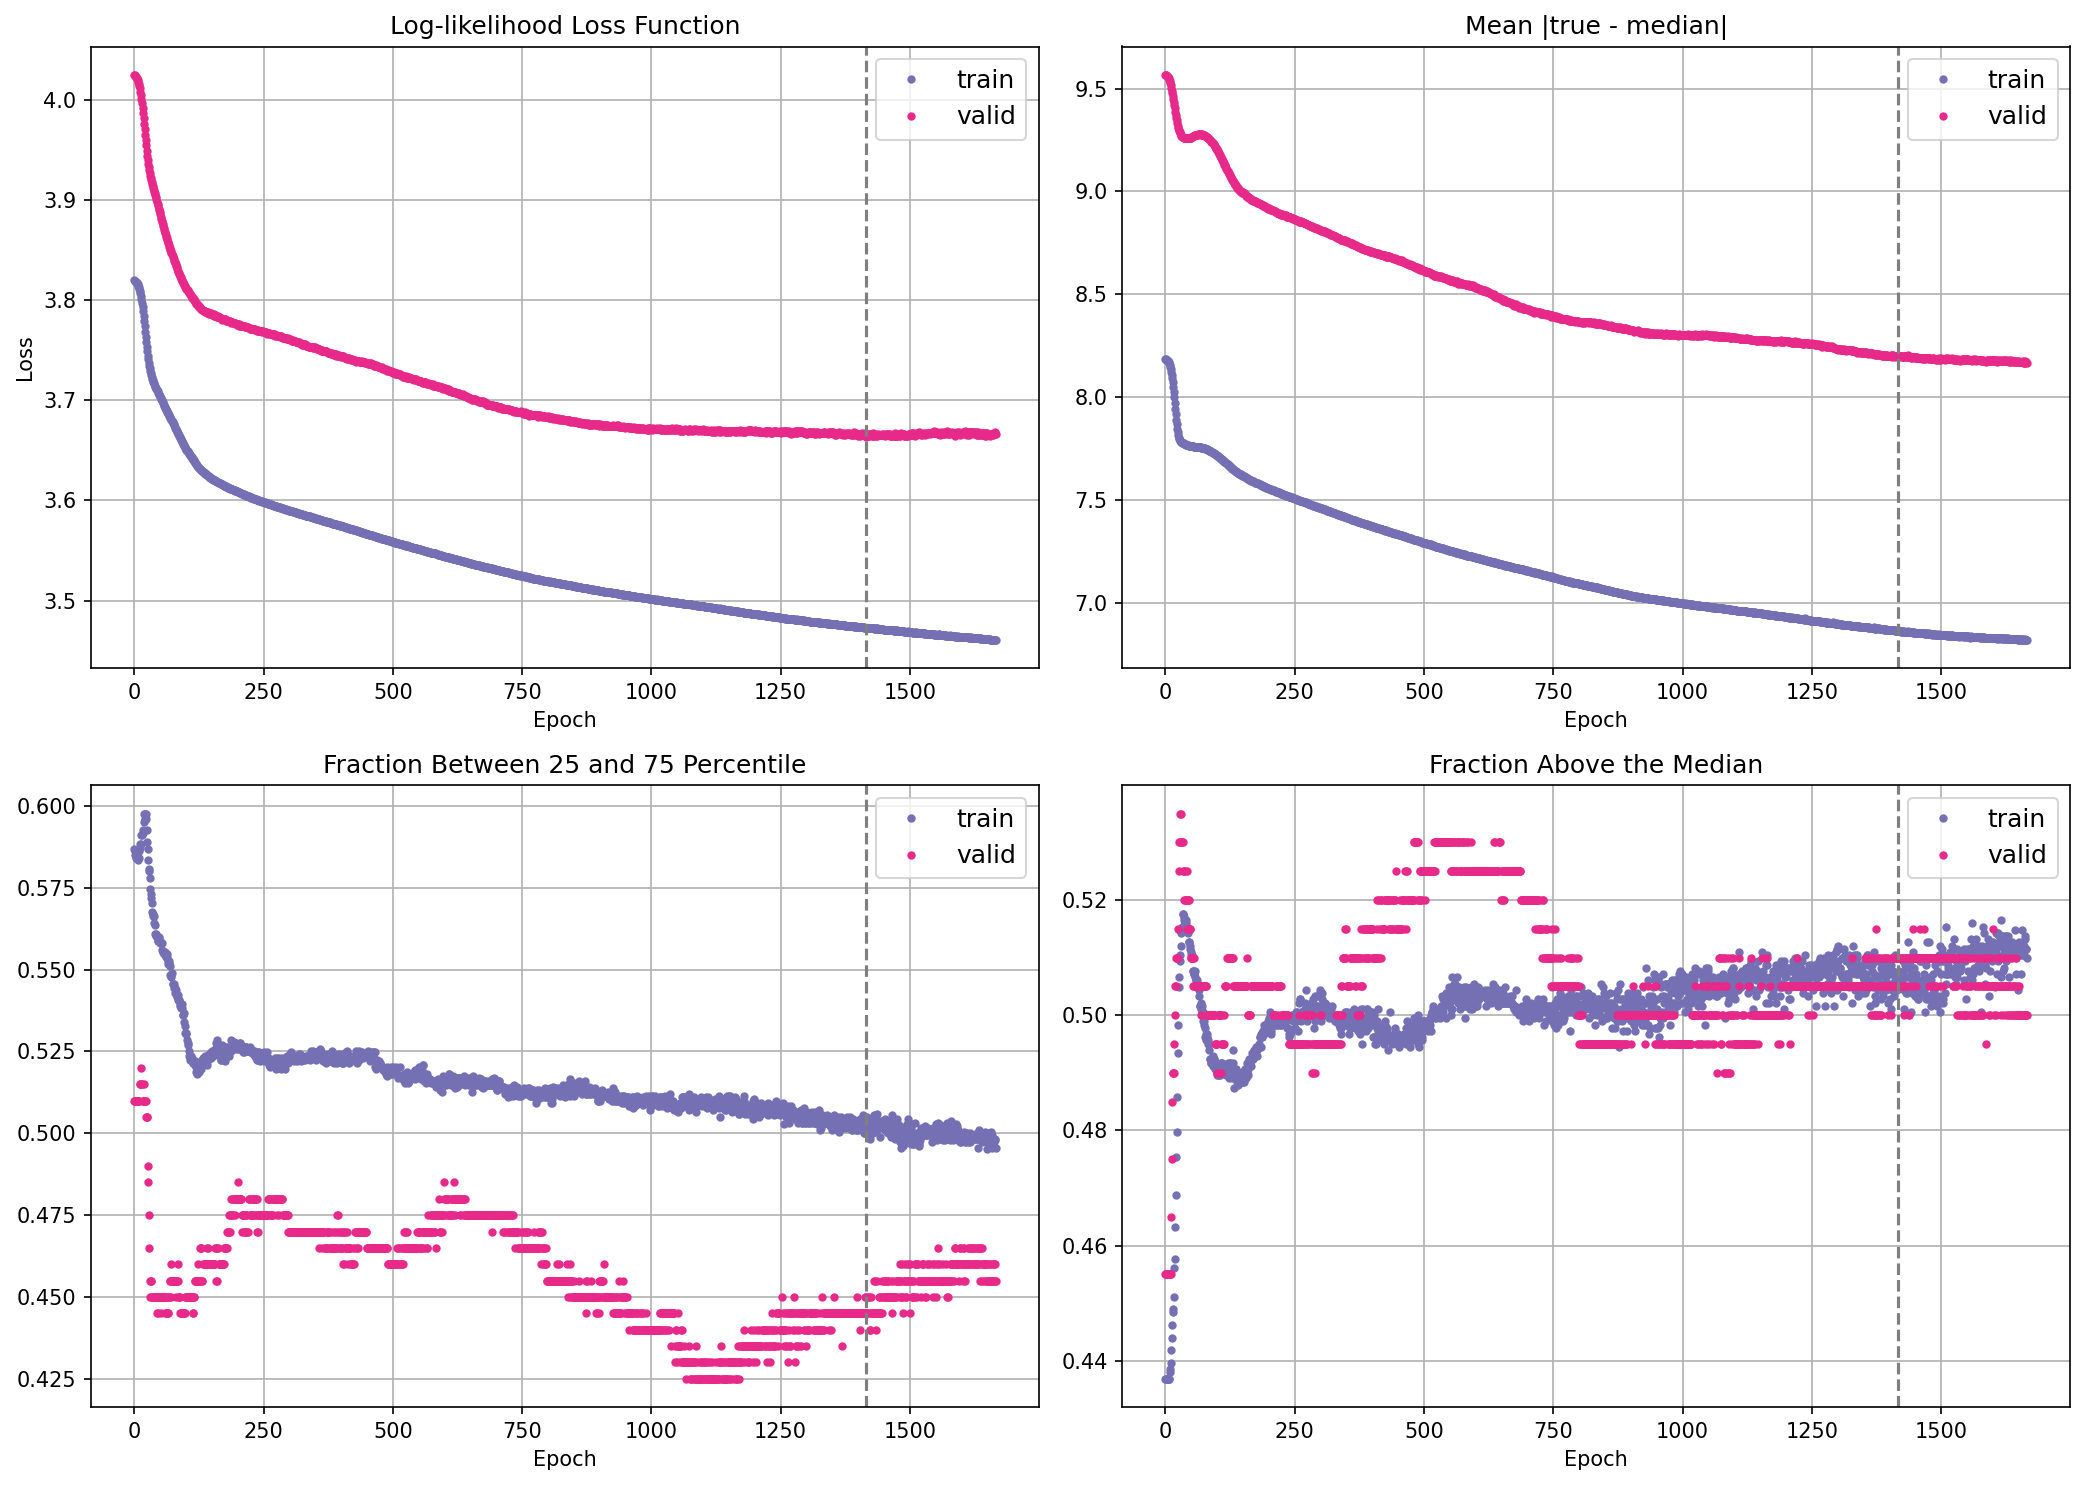

years(2016,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (281, 3),
 'onehot_train_shape': (1822, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (281, 11),
 'x_train_shape': (1822, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2016_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 368.
Epoch 00618: early stopping
{'best_epoch': 367,
 'elapsed_time': 42.764995098114014,
 'loss_train': 3.59879207611084,
 'loss_valid': 3.623089551925659,
 'network_seed': 739}


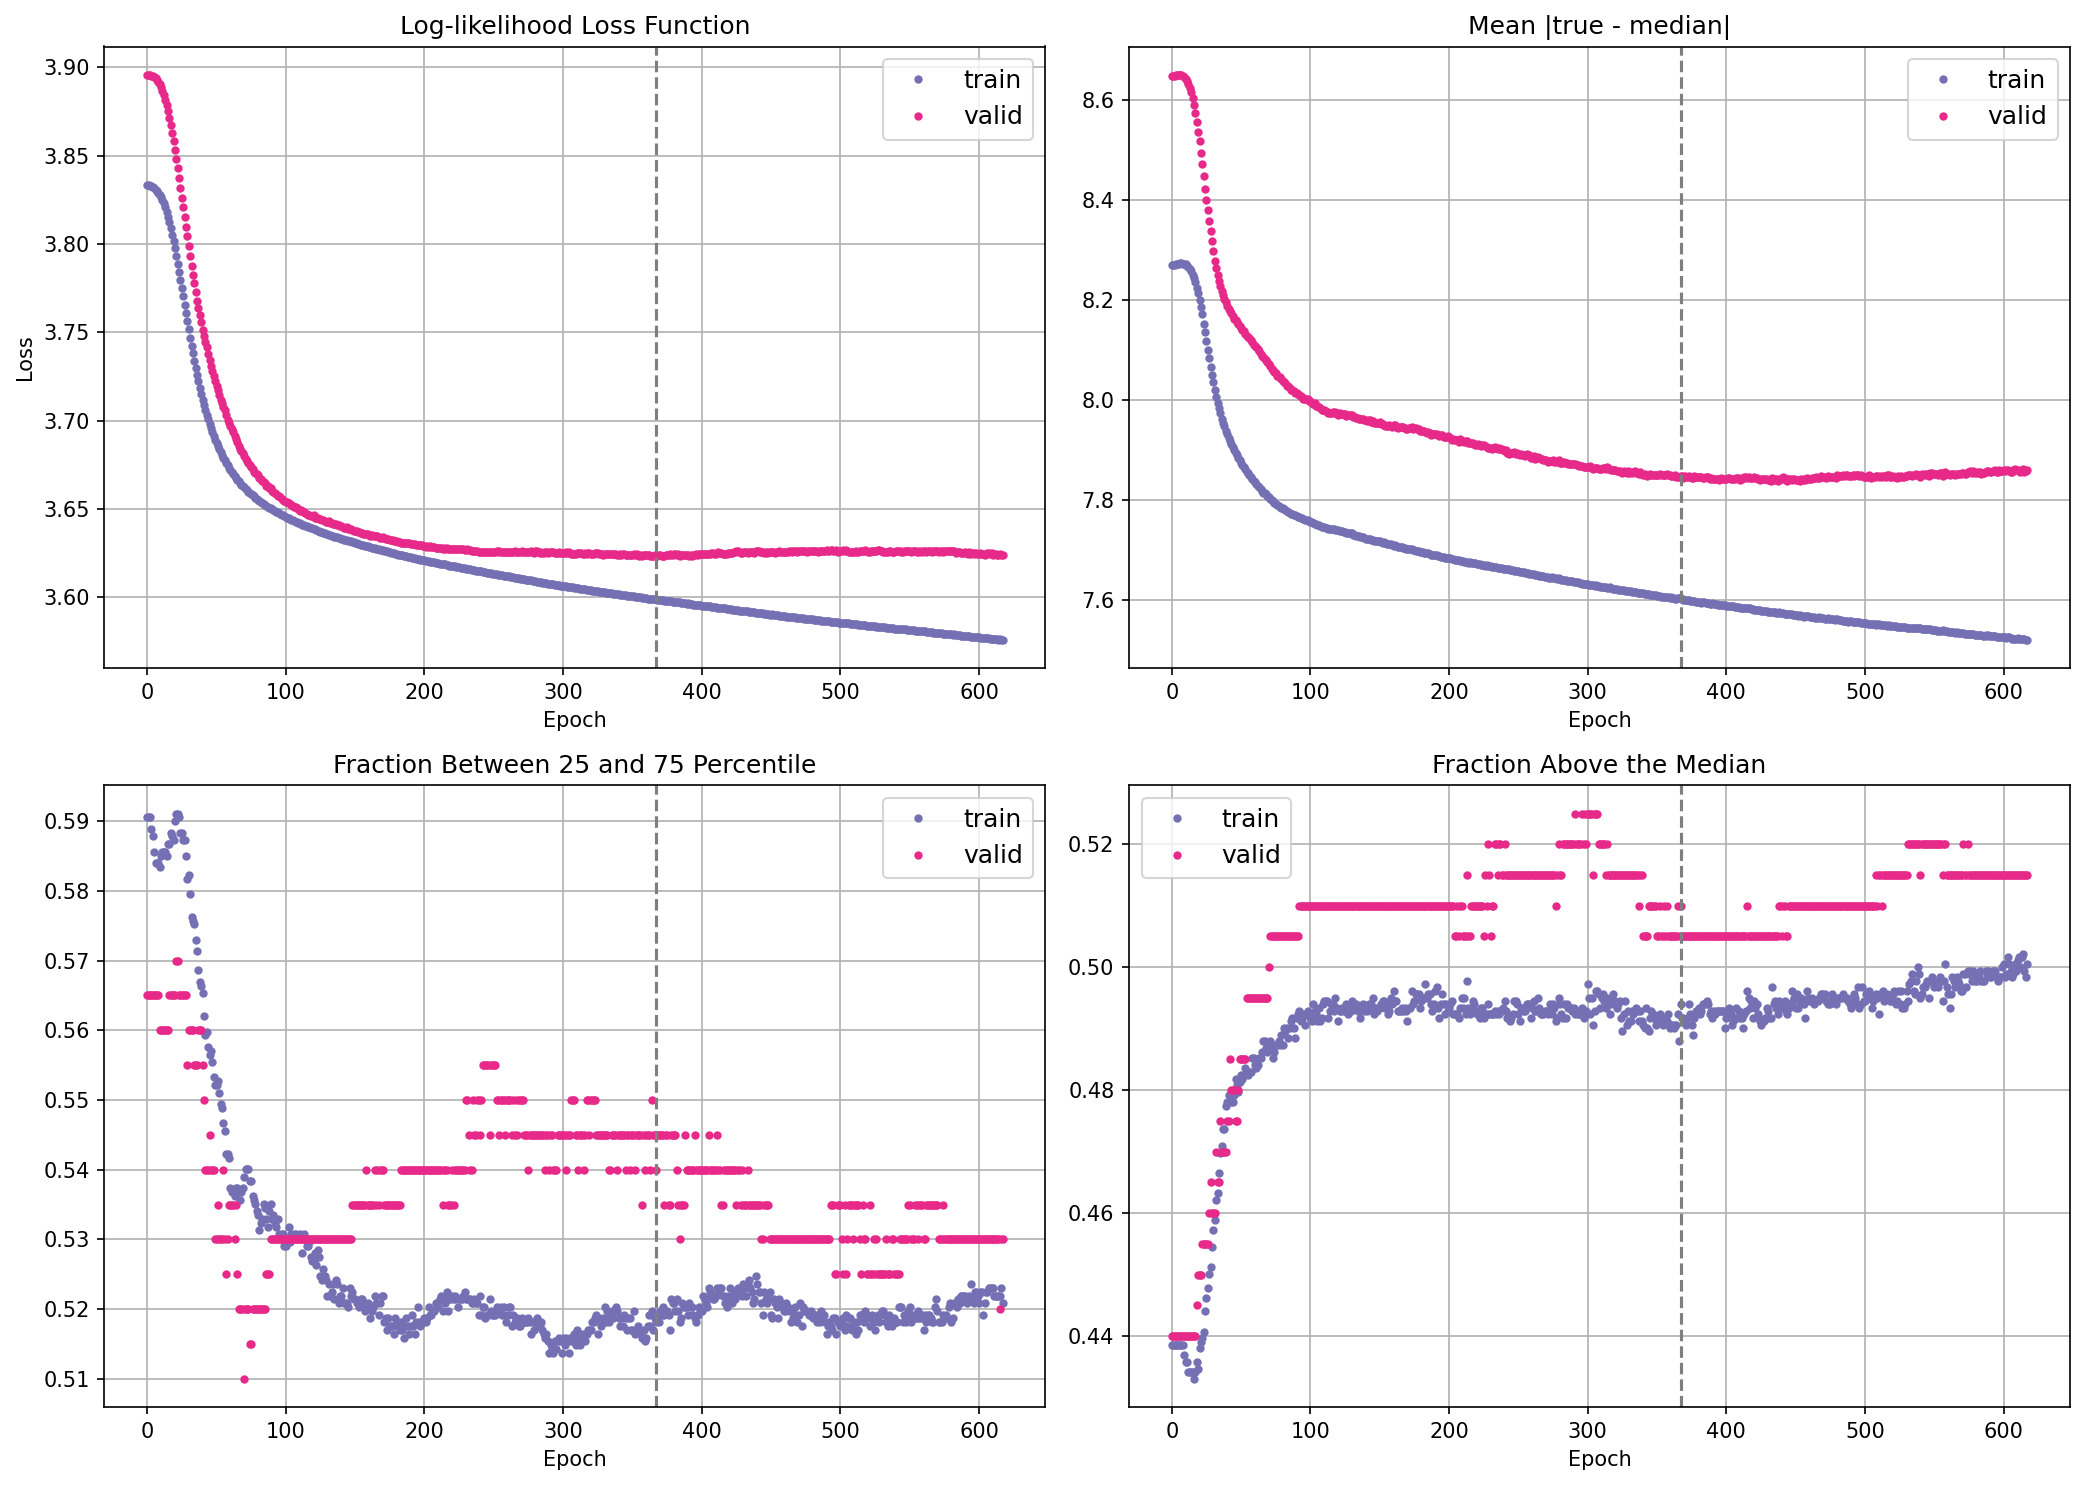

years(2017,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (322, 3),
 'onehot_train_shape': (1781, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (322, 11),
 'x_train_shape': (1781, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2017_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 3444.
Epoch 03694: early stopping
{'best_epoch': 3443,
 'elapsed_time': 210.5786690711975,
 'loss_train': 3.4169082641601562,
 'loss_valid': 3.5849761962890625,
 'network_seed': 416}


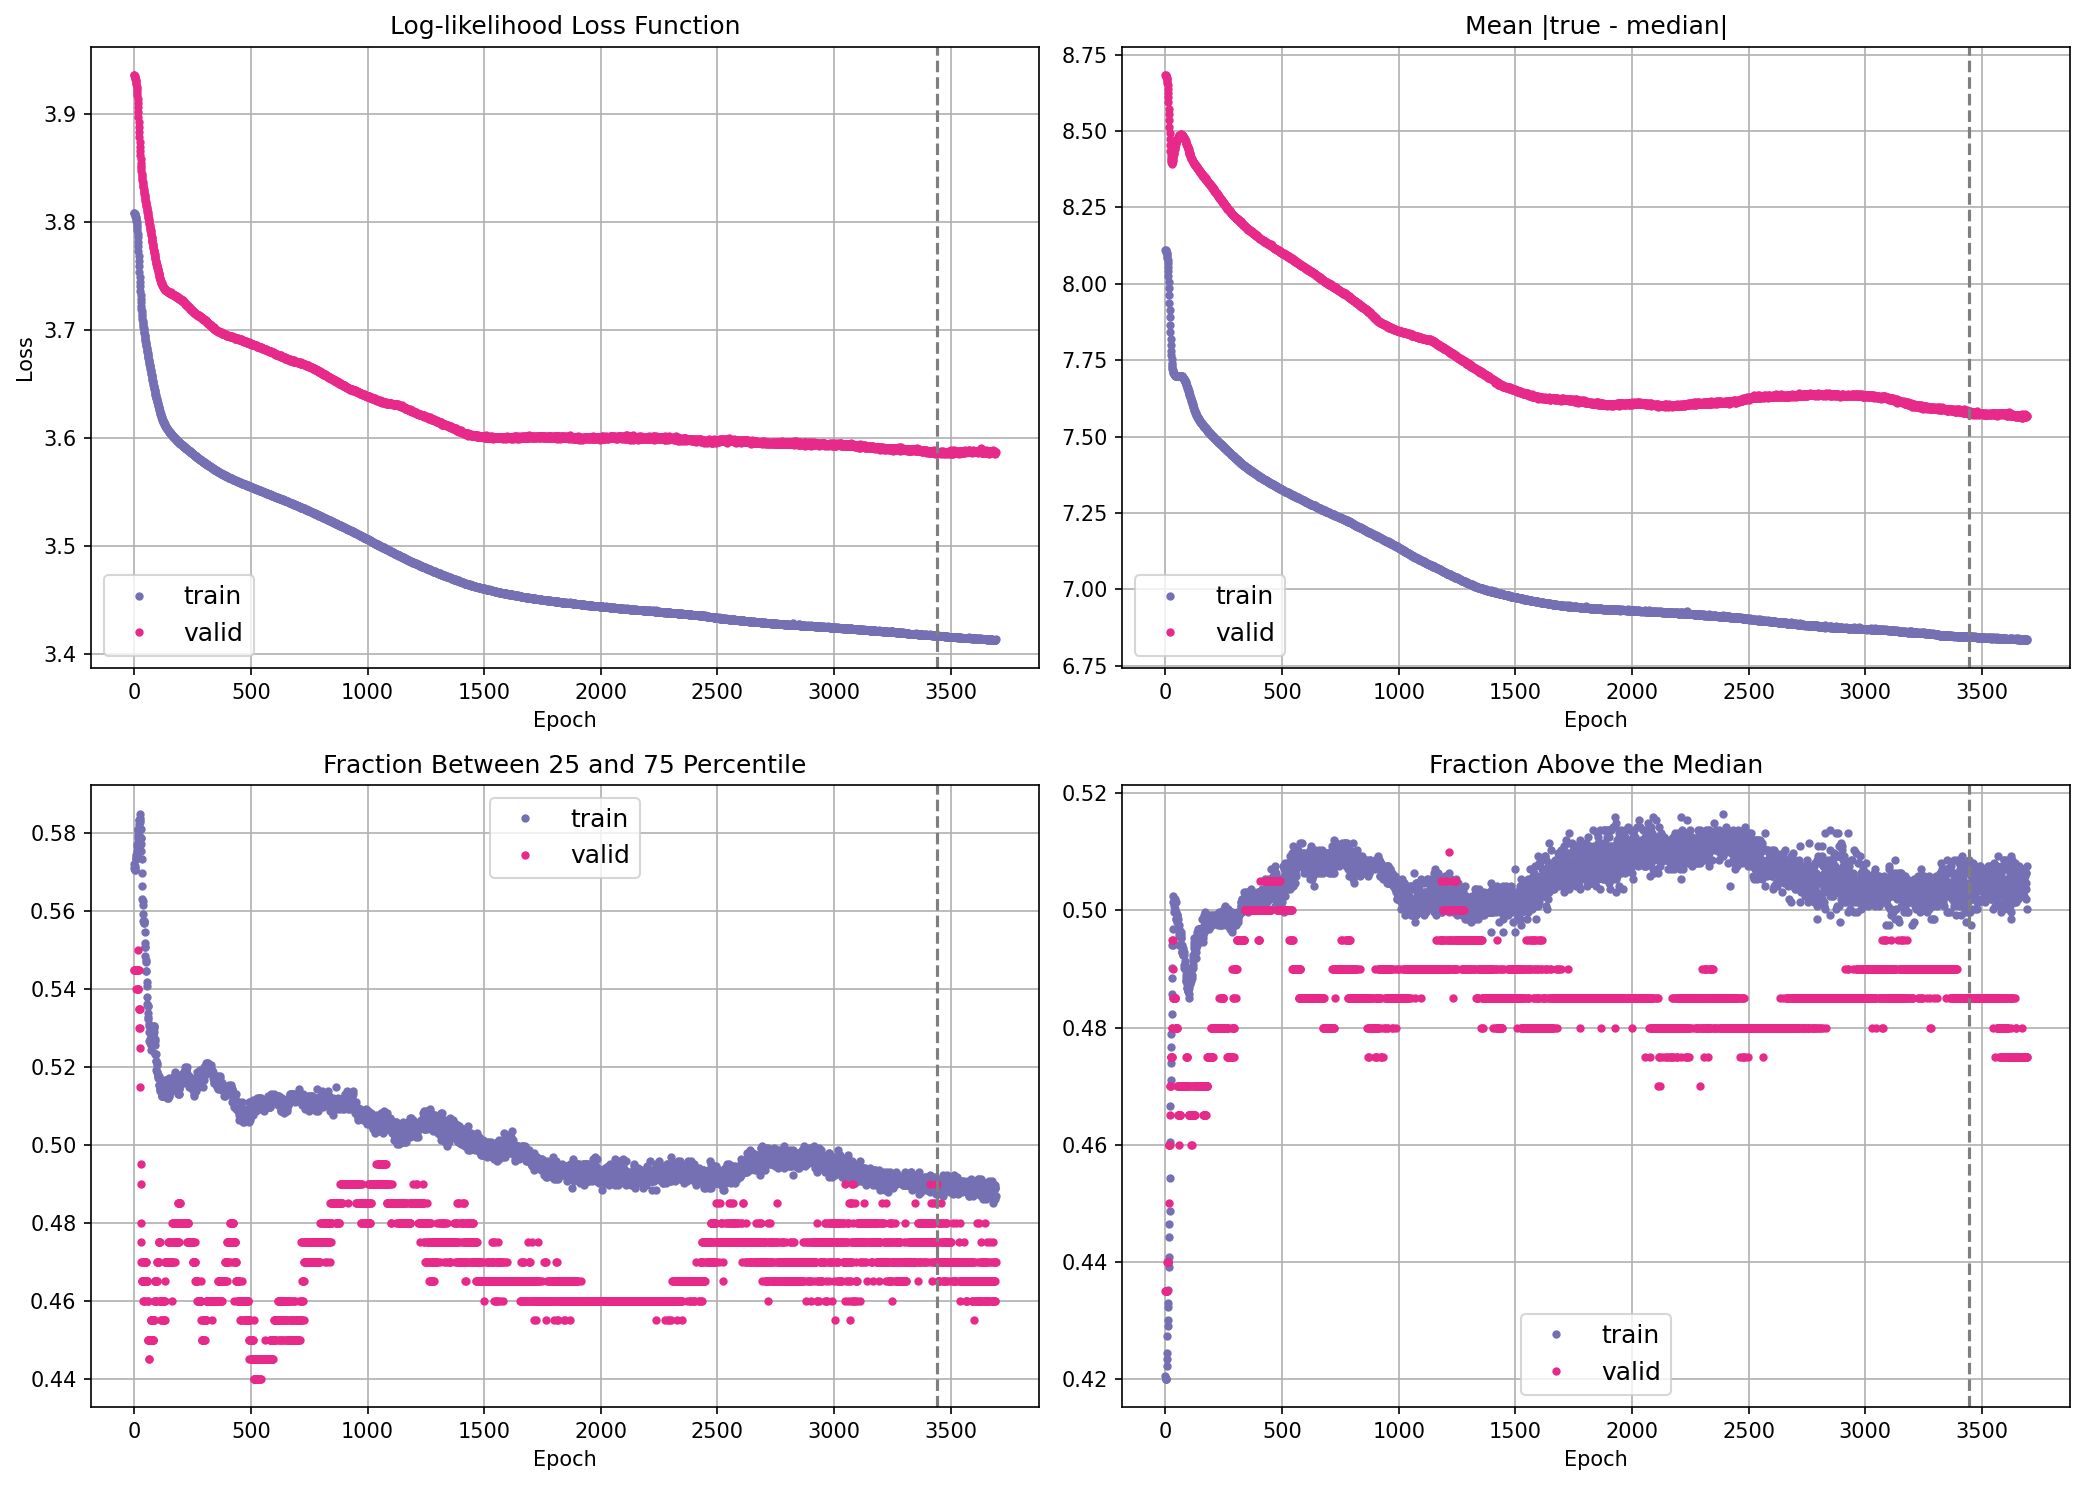

years(2017,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (322, 3),
 'onehot_train_shape': (1781, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (322, 11),
 'x_train_shape': (1781, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2017_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 375.
Epoch 00625: early stopping
{'best_epoch': 374,
 'elapsed_time': 35.20841693878174,
 'loss_train': 3.569425344467163,
 'loss_valid': 3.6070494651794434,
 'network_seed': 739}


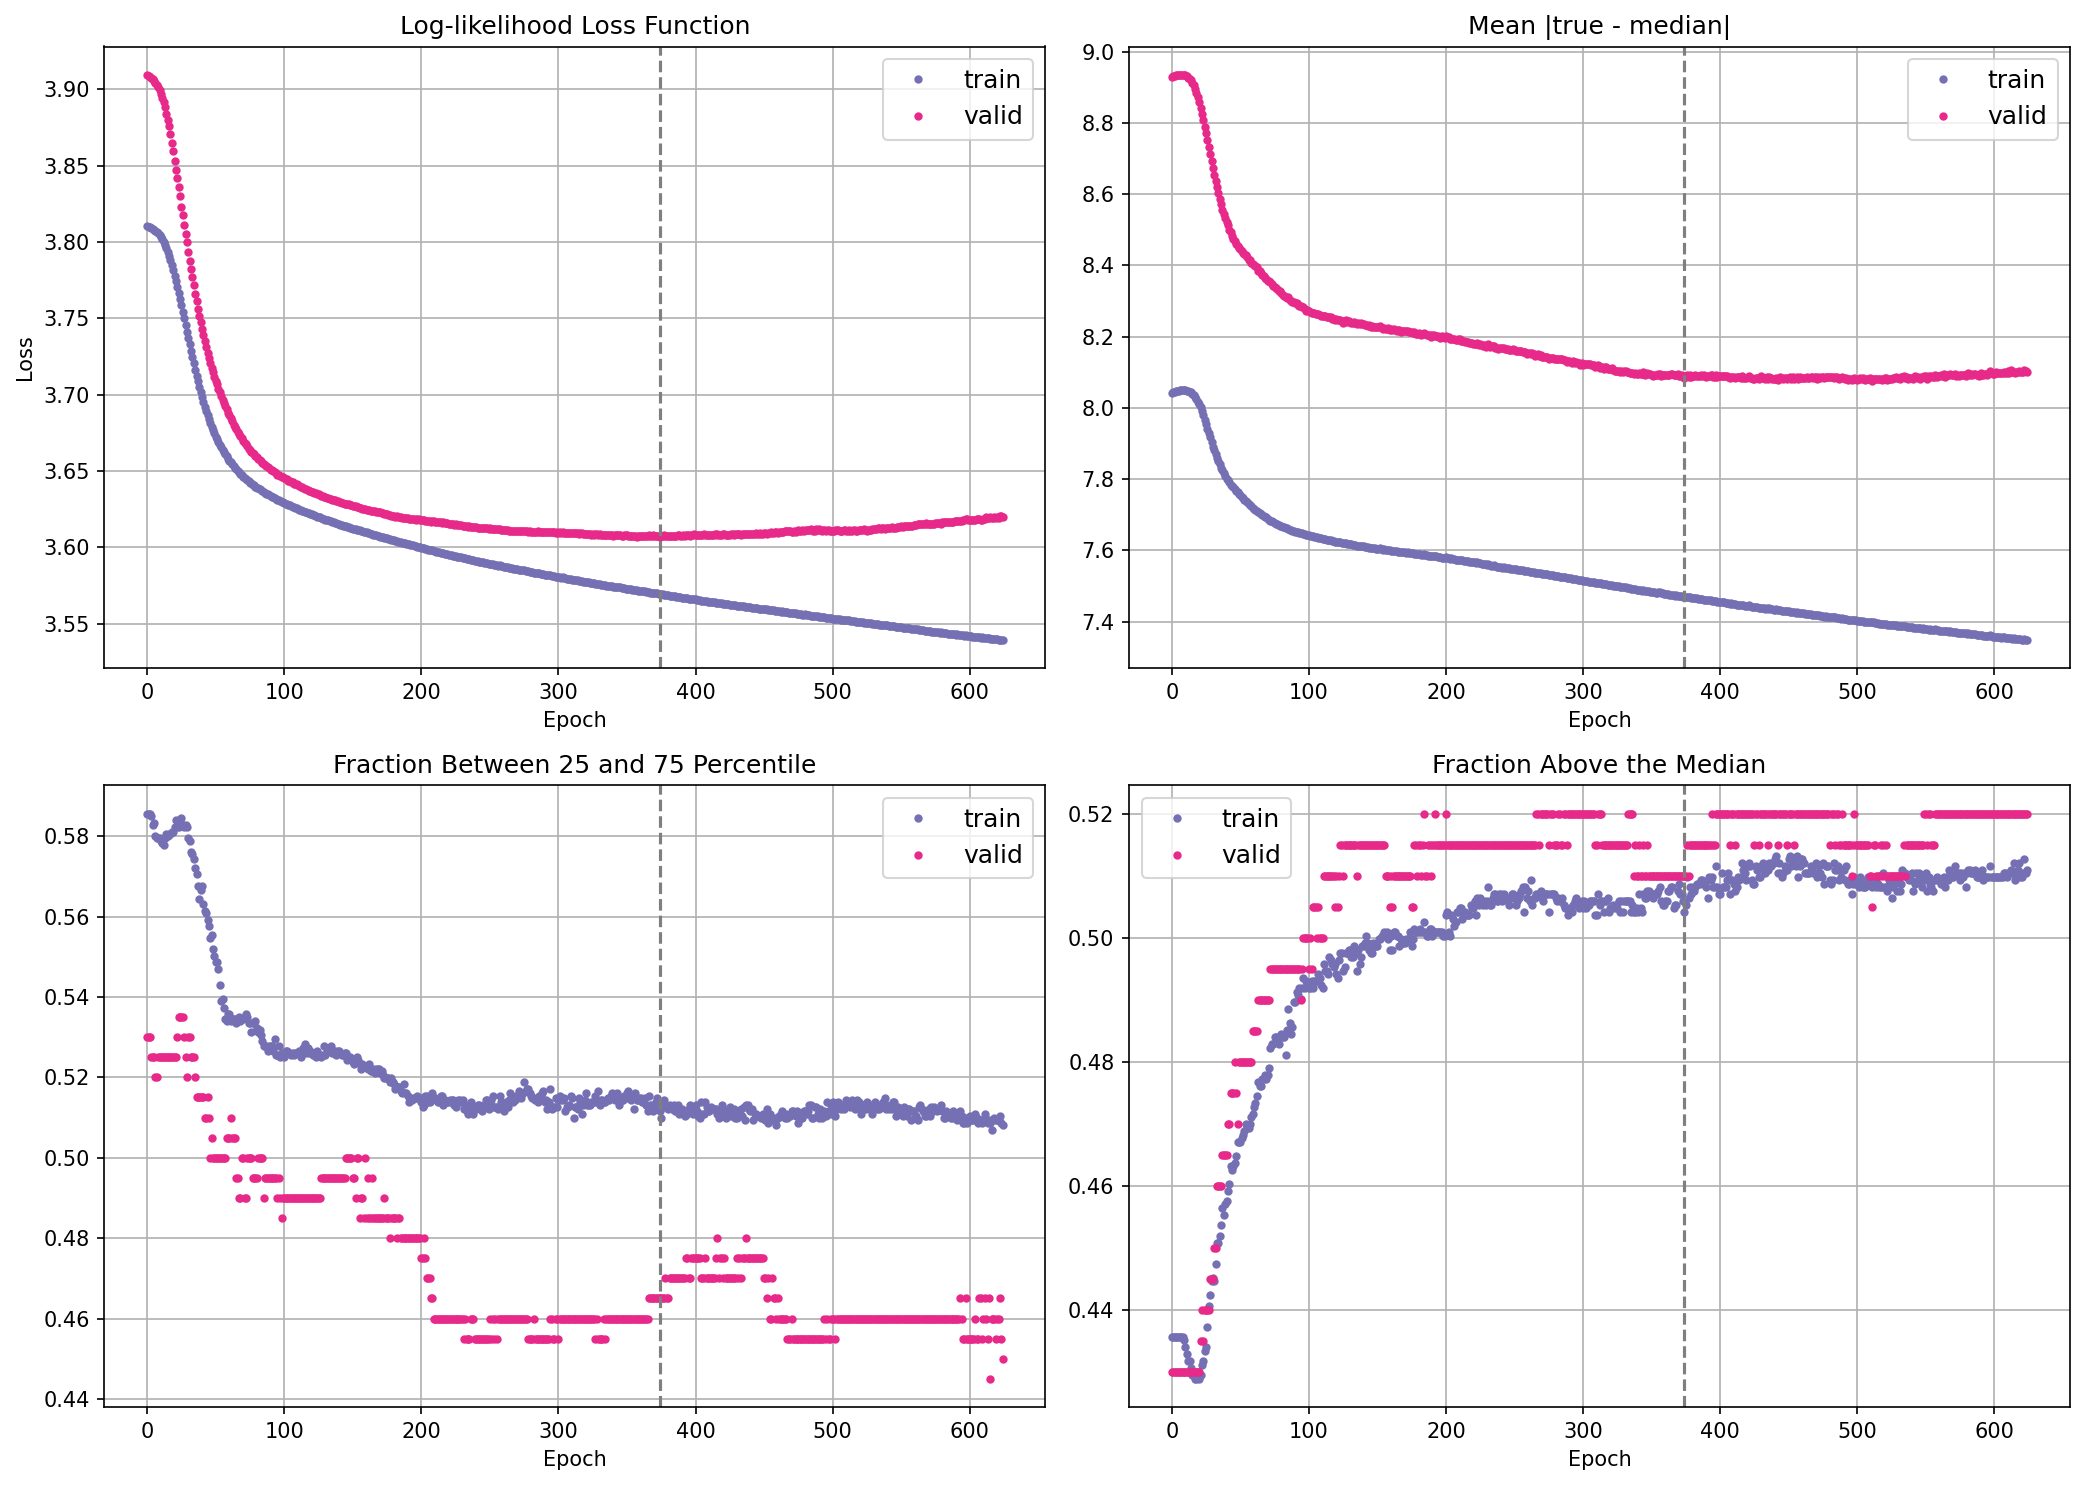

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (304, 3),
 'onehot_train_shape': (1799, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (304, 11),
 'x_train_shape': (1799, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2018_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 664.
Epoch 00914: early stopping
{'best_epoch': 663,
 'elapsed_time': 52.27941703796387,
 'loss_train': 3.5172057151794434,
 'loss_valid': 3.7254269123077393,
 'network_seed': 416}


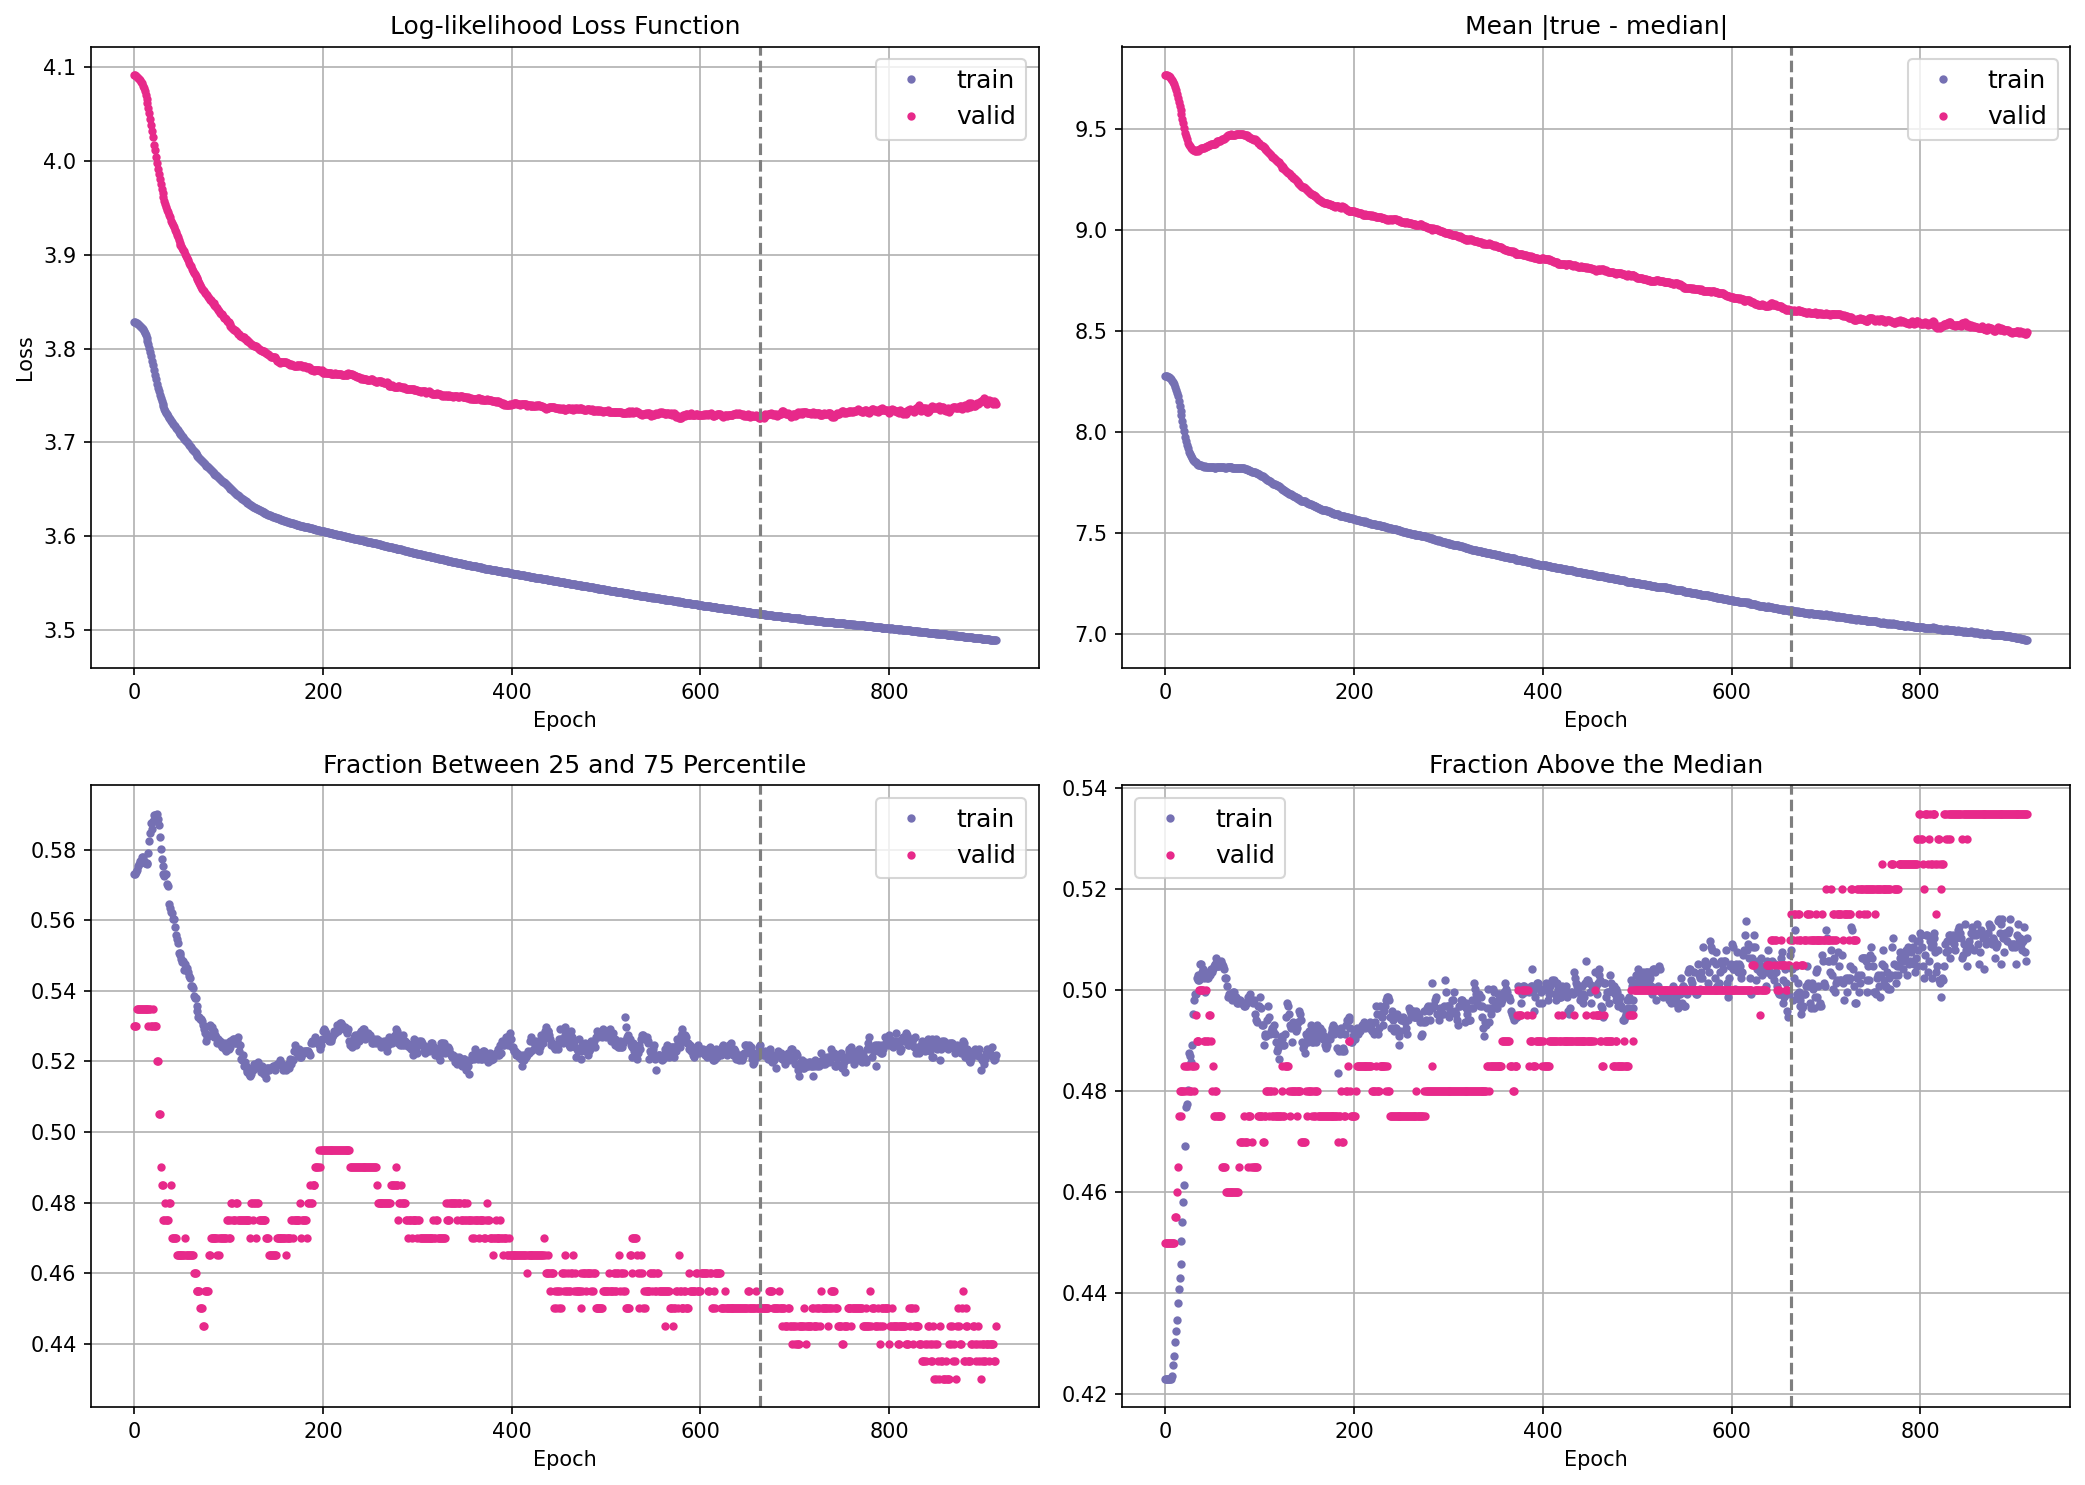

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (304, 3),
 'onehot_train_shape': (1799, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (304, 11),
 'x_train_shape': (1799, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2018_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 284.
Epoch 00534: early stopping
{'best_epoch': 283,
 'elapsed_time': 31.324433088302612,
 'loss_train': 3.6046855449676514,
 'loss_valid': 3.6479616165161133,
 'network_seed': 739}


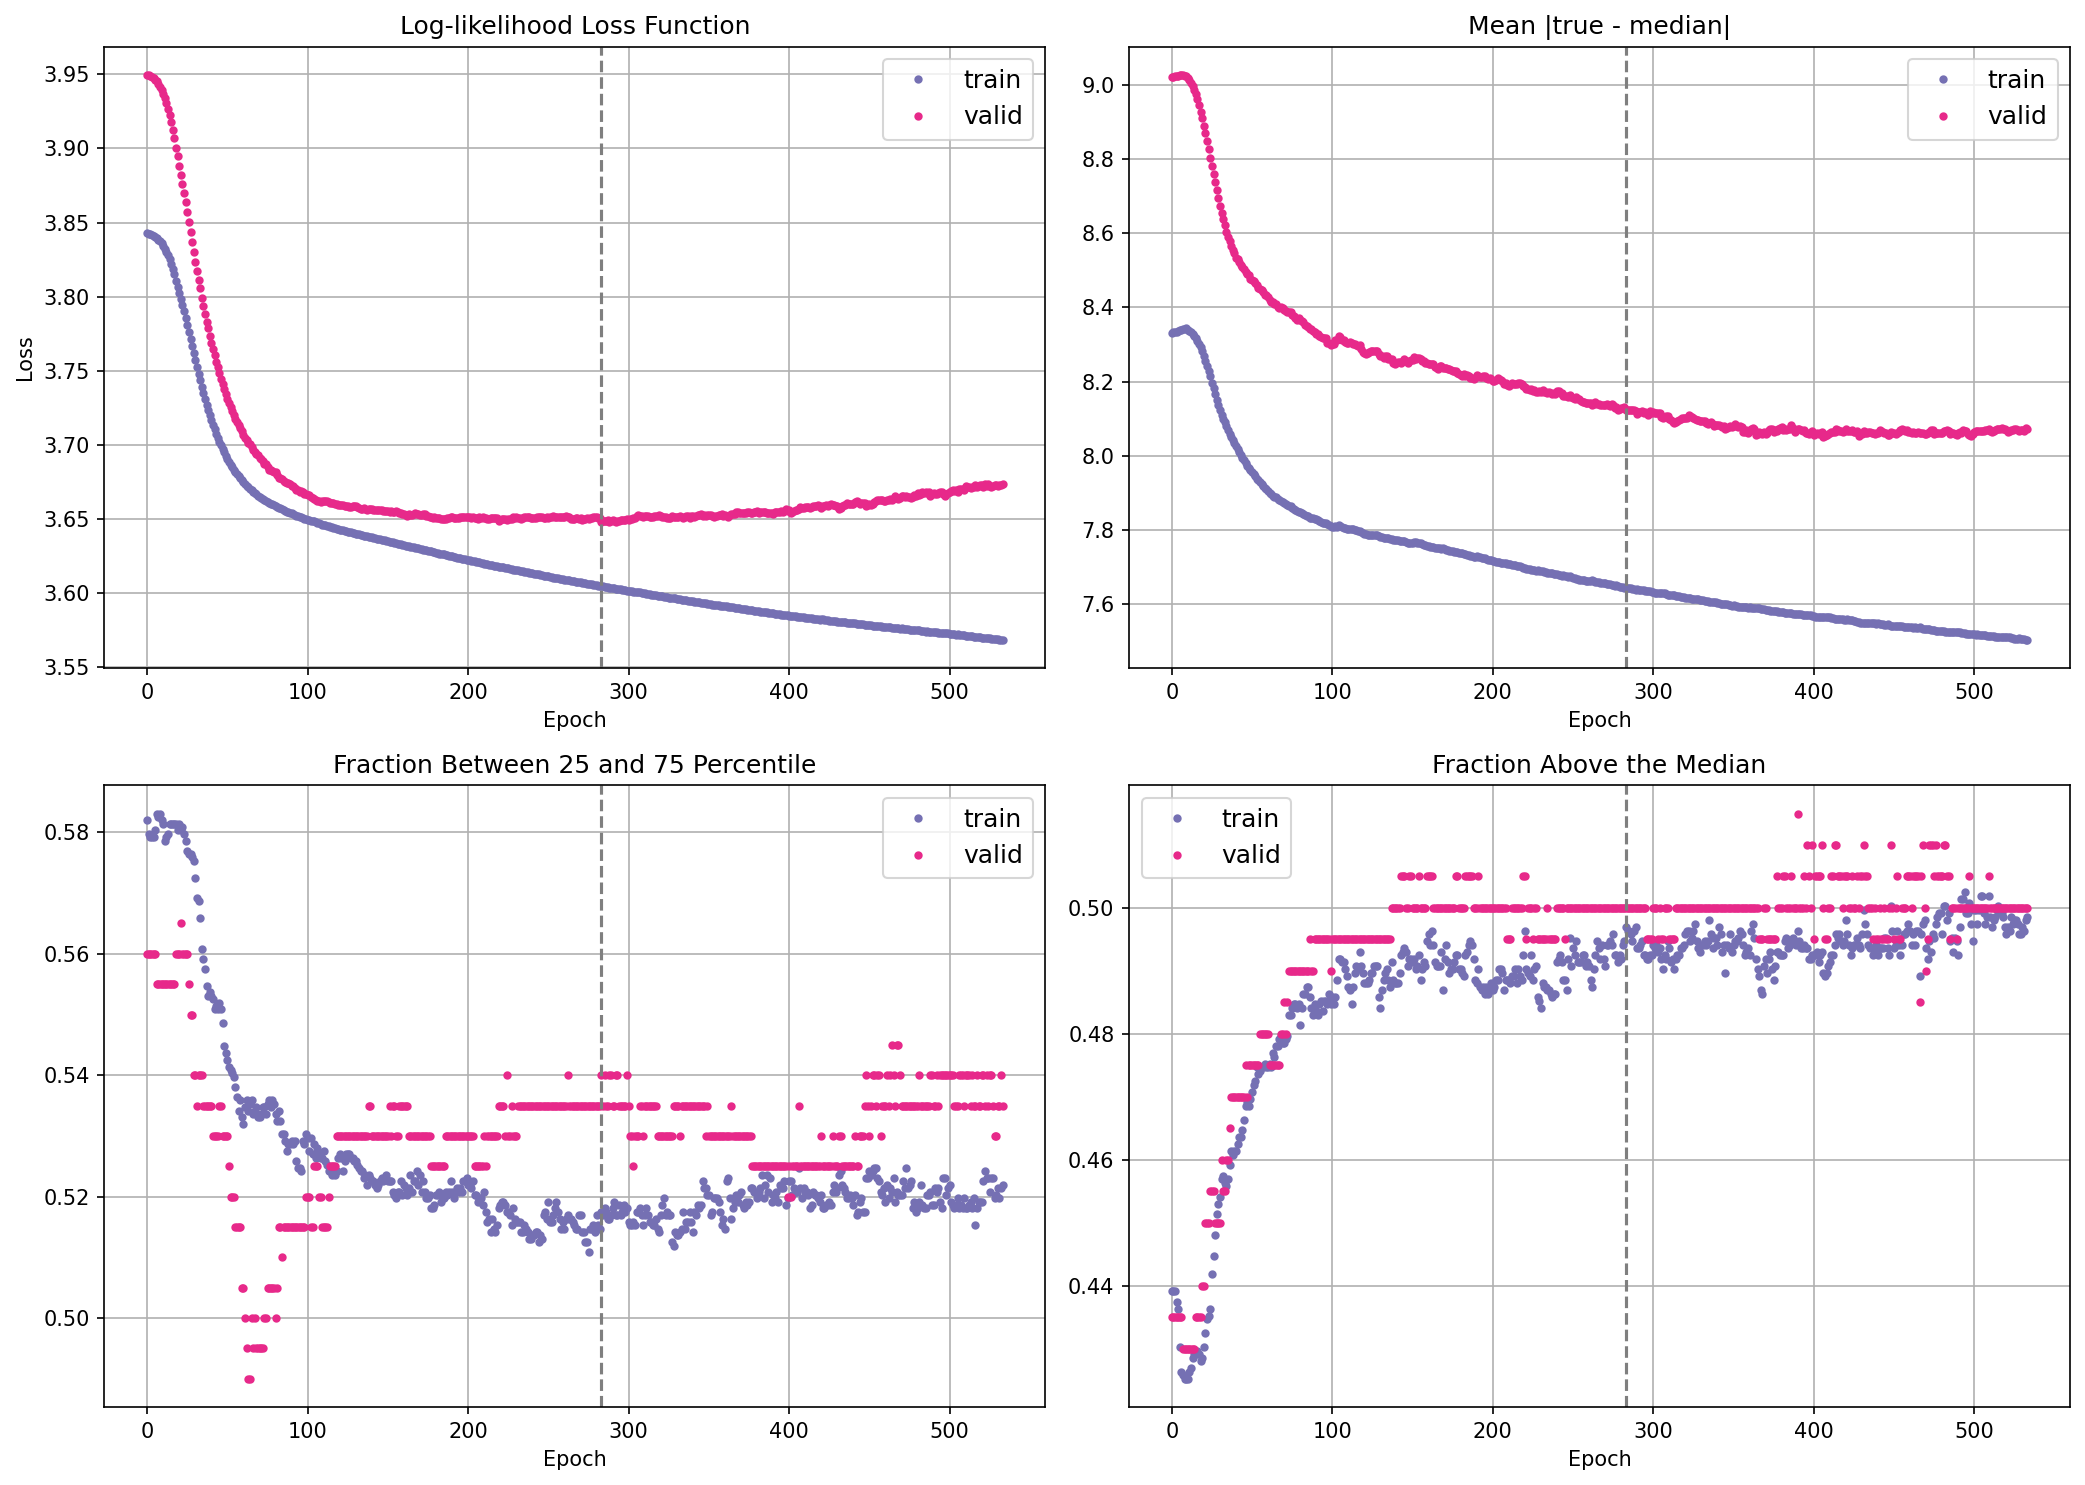

years(2019,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (232, 3),
 'onehot_train_shape': (1871, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (232, 11),
 'x_train_shape': (1871, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2019_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 3122.
Epoch 03372: early stopping
{'best_epoch': 3121,
 'elapsed_time': 199.65423727035522,
 'loss_train': 3.38964581489563,
 'loss_valid': 3.6056363582611084,
 'network_seed': 416}


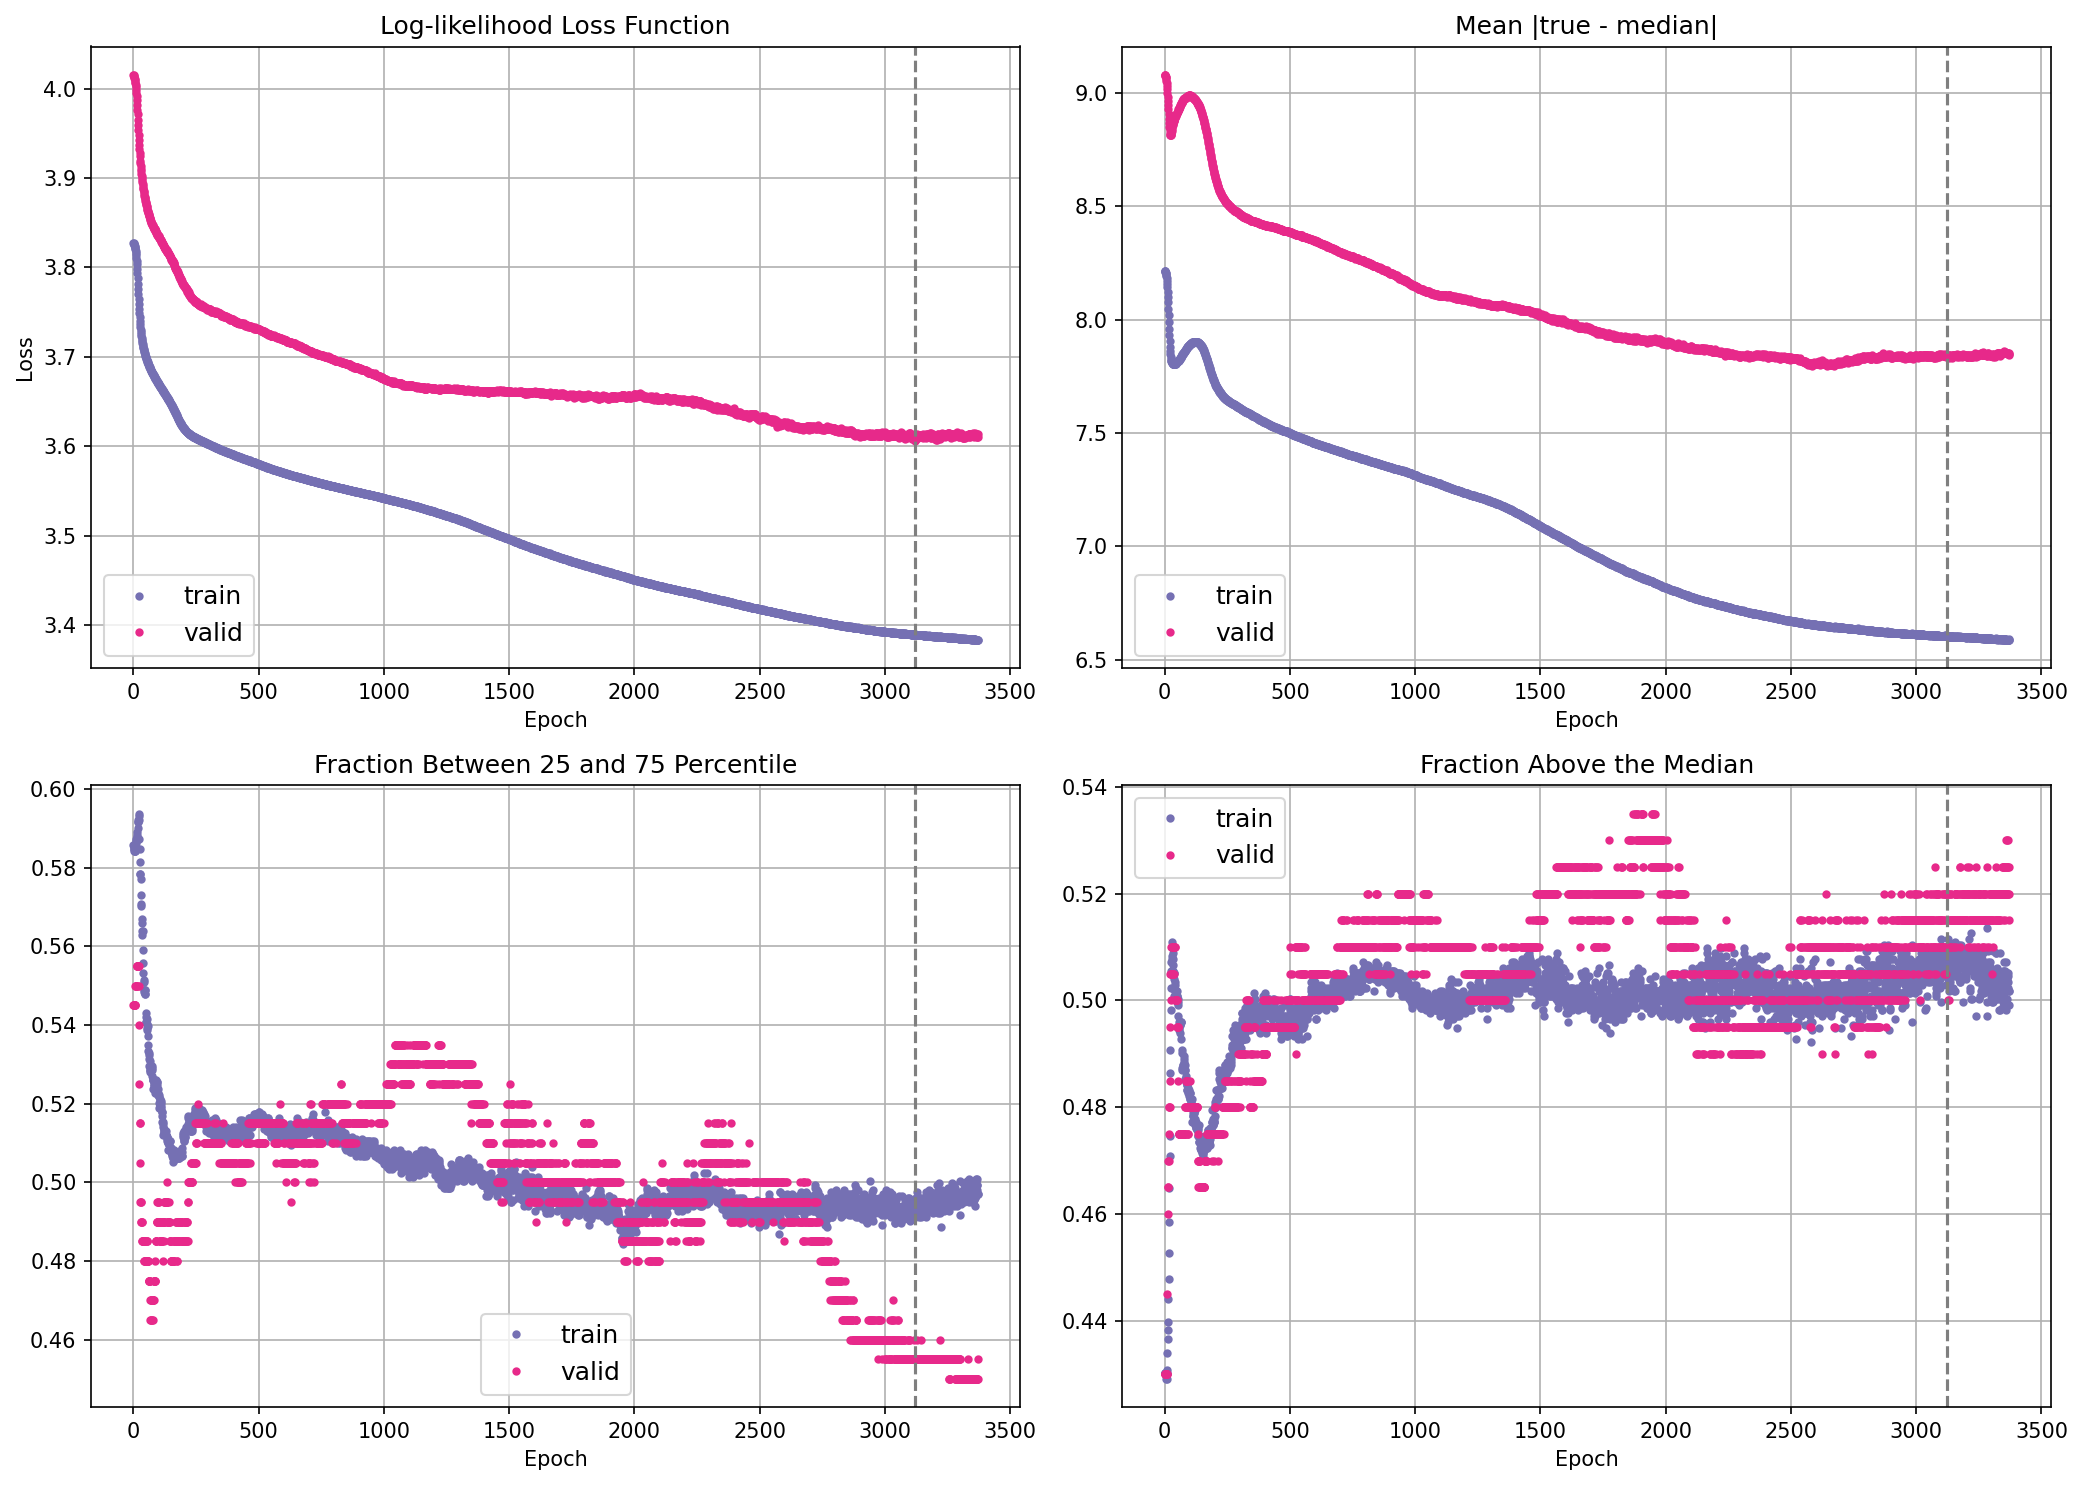

years(2019,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (232, 3),
 'onehot_train_shape': (1871, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (232, 11),
 'x_train_shape': (1871, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2019_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 753.
Epoch 01003: early stopping
{'best_epoch': 752,
 'elapsed_time': 57.95144867897034,
 'loss_train': 3.5442841053009033,
 'loss_valid': 3.6478171348571777,
 'network_seed': 739}


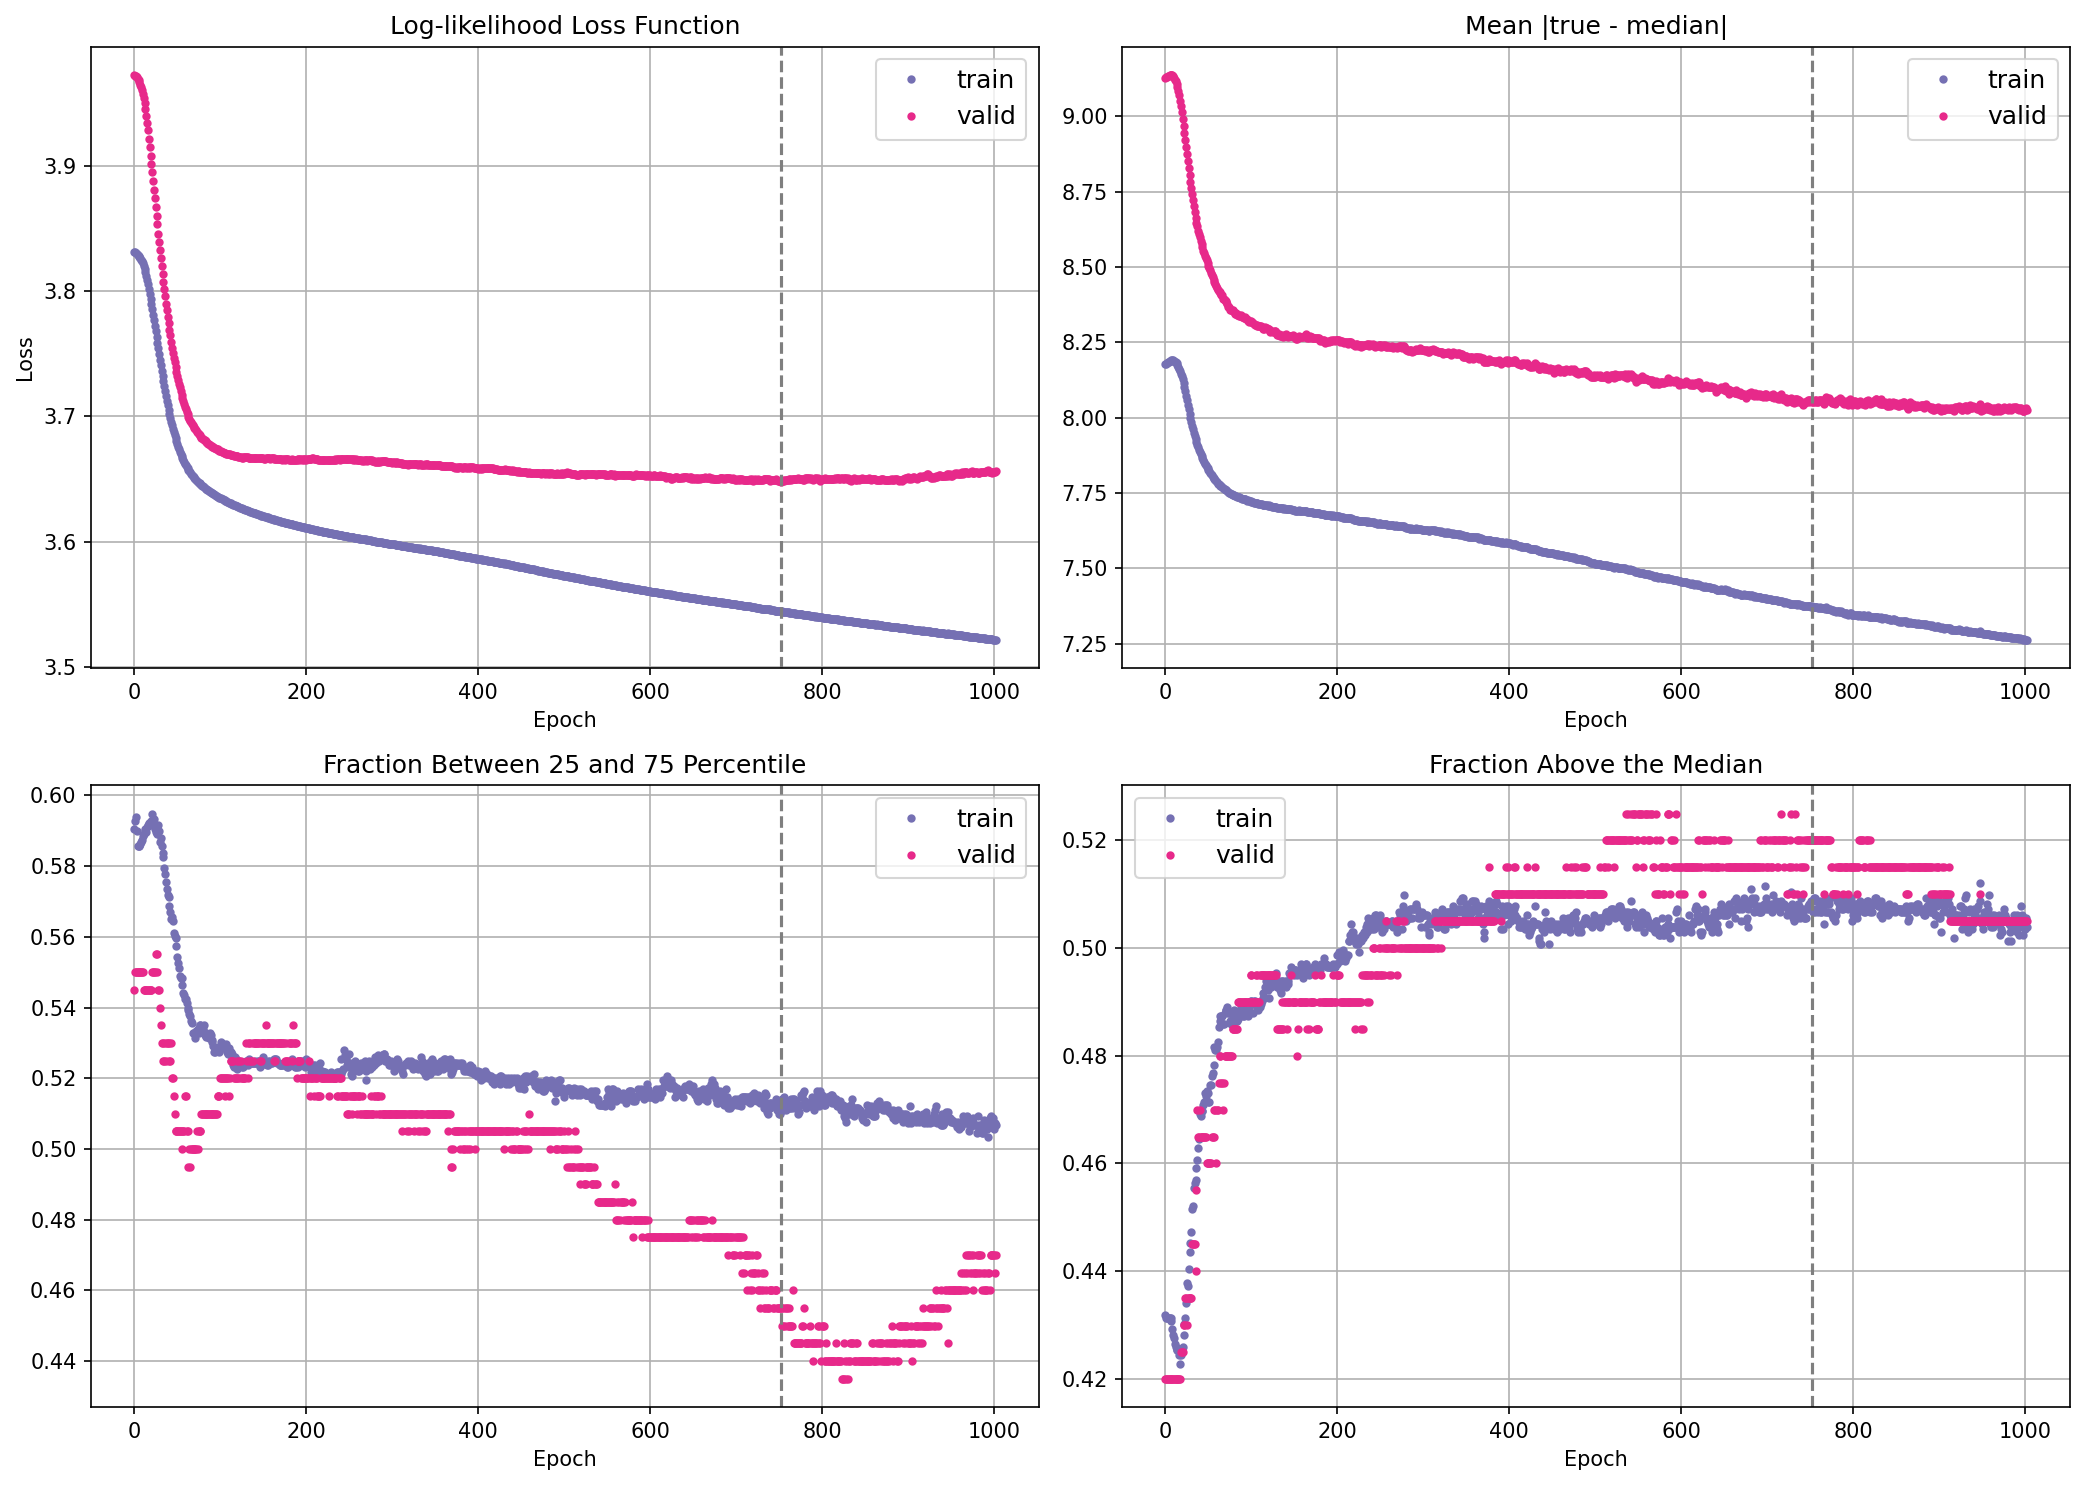

years(2020,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (456, 3),
 'onehot_train_shape': (1647, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (456, 11),
 'x_train_shape': (1647, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2020_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 1218.
Epoch 01468: early stopping
{'best_epoch': 1217,
 'elapsed_time': 79.05582809448242,
 'loss_train': 3.4908246994018555,
 'loss_valid': 3.7365381717681885,
 'network_seed': 416}


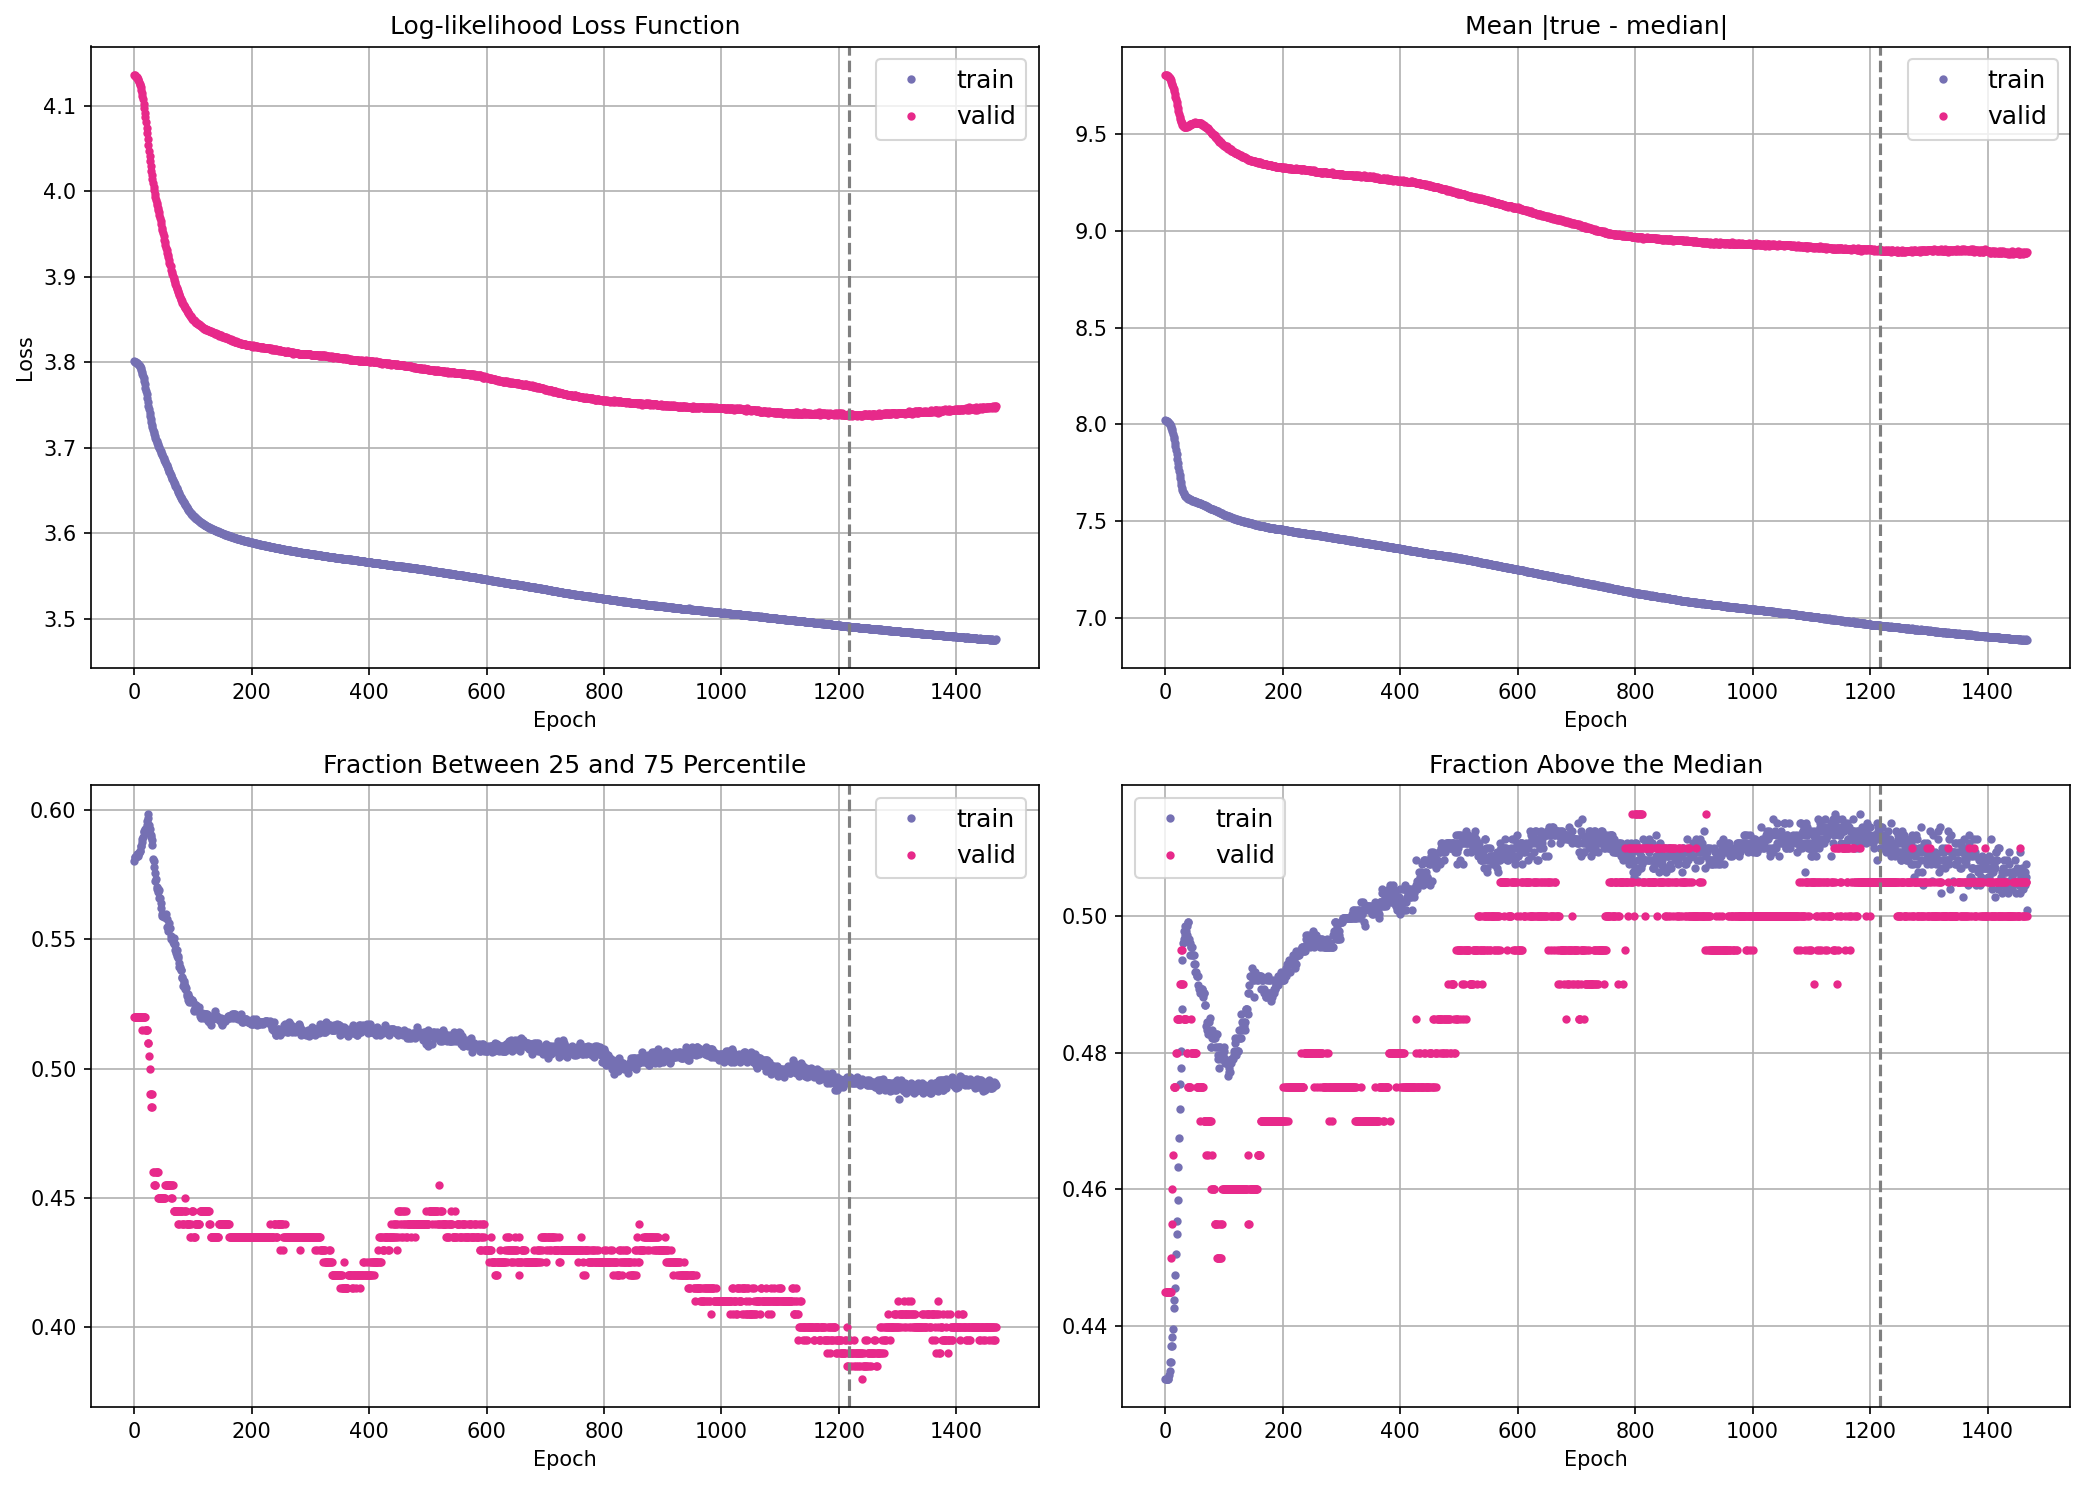

years(2020,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (456, 3),
 'onehot_train_shape': (1647, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (456, 11),
 'x_train_shape': (1647, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2020_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 153.
Epoch 00403: early stopping
{'best_epoch': 152,
 'elapsed_time': 22.398739099502563,
 'loss_train': 3.6160881519317627,
 'loss_valid': 3.6772754192352295,
 'network_seed': 739}


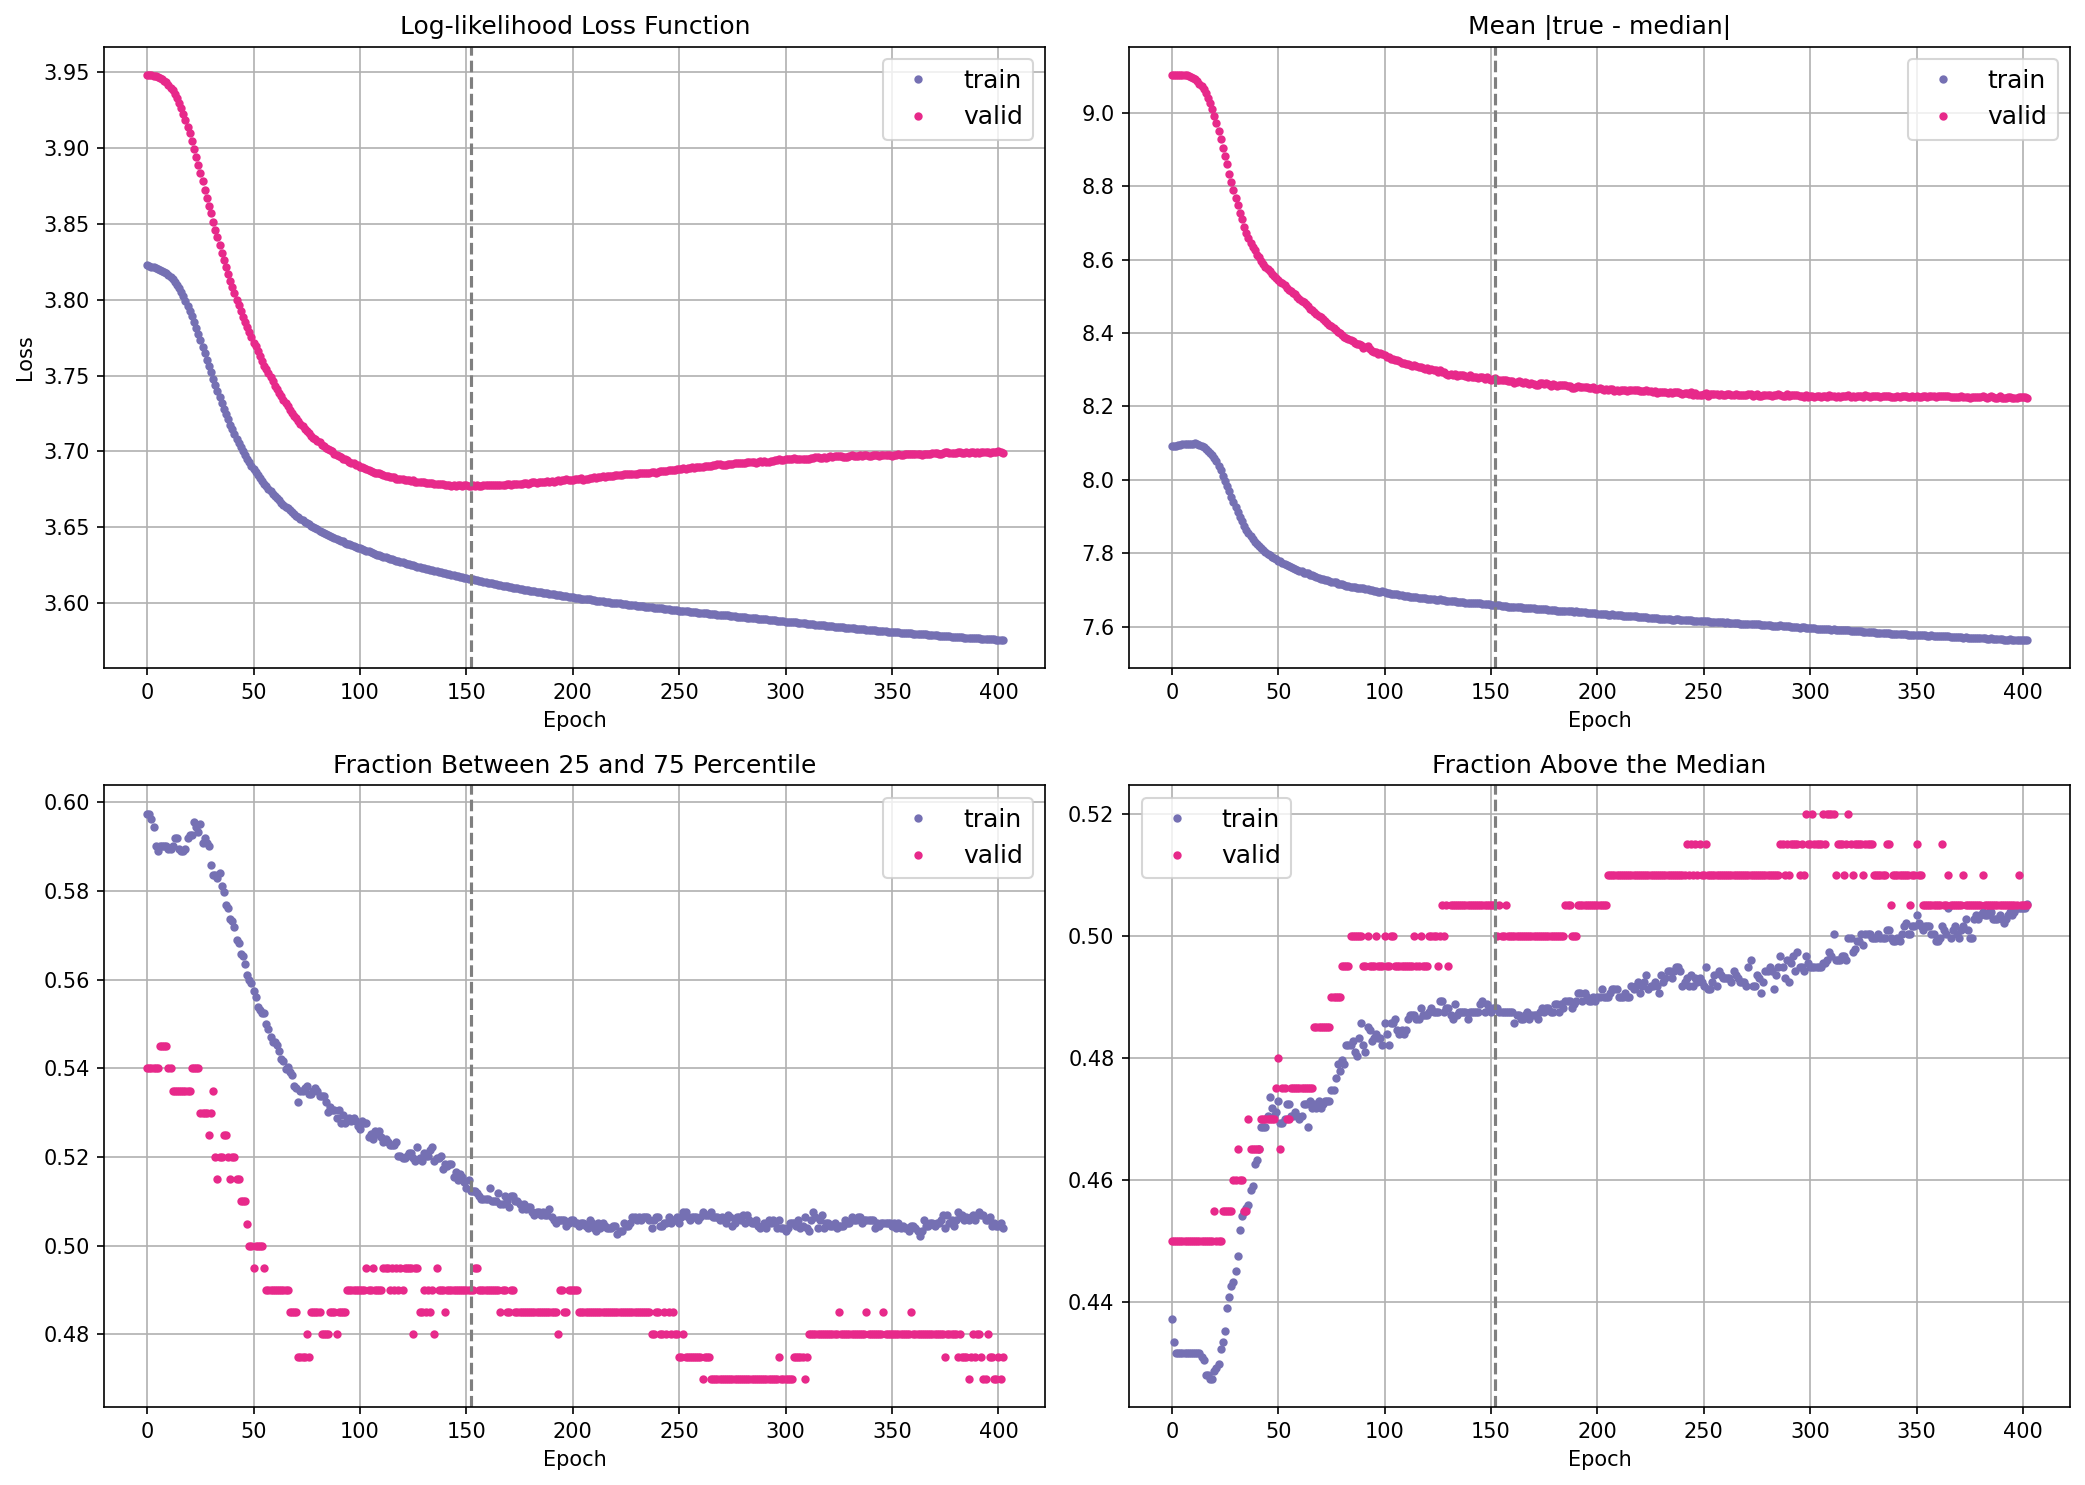

years(2021,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (308, 3),
 'onehot_train_shape': (1795, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (308, 11),
 'x_train_shape': (1795, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2021_shash3_network_seed_416_rng_seed_416'
Restoring model weights from the end of the best epoch: 1112.
Epoch 01362: early stopping
{'best_epoch': 1111,
 'elapsed_time': 77.44379496574402,
 'loss_train': 3.519139528274536,
 'loss_valid': 3.6861069202423096,
 'network_seed': 416}


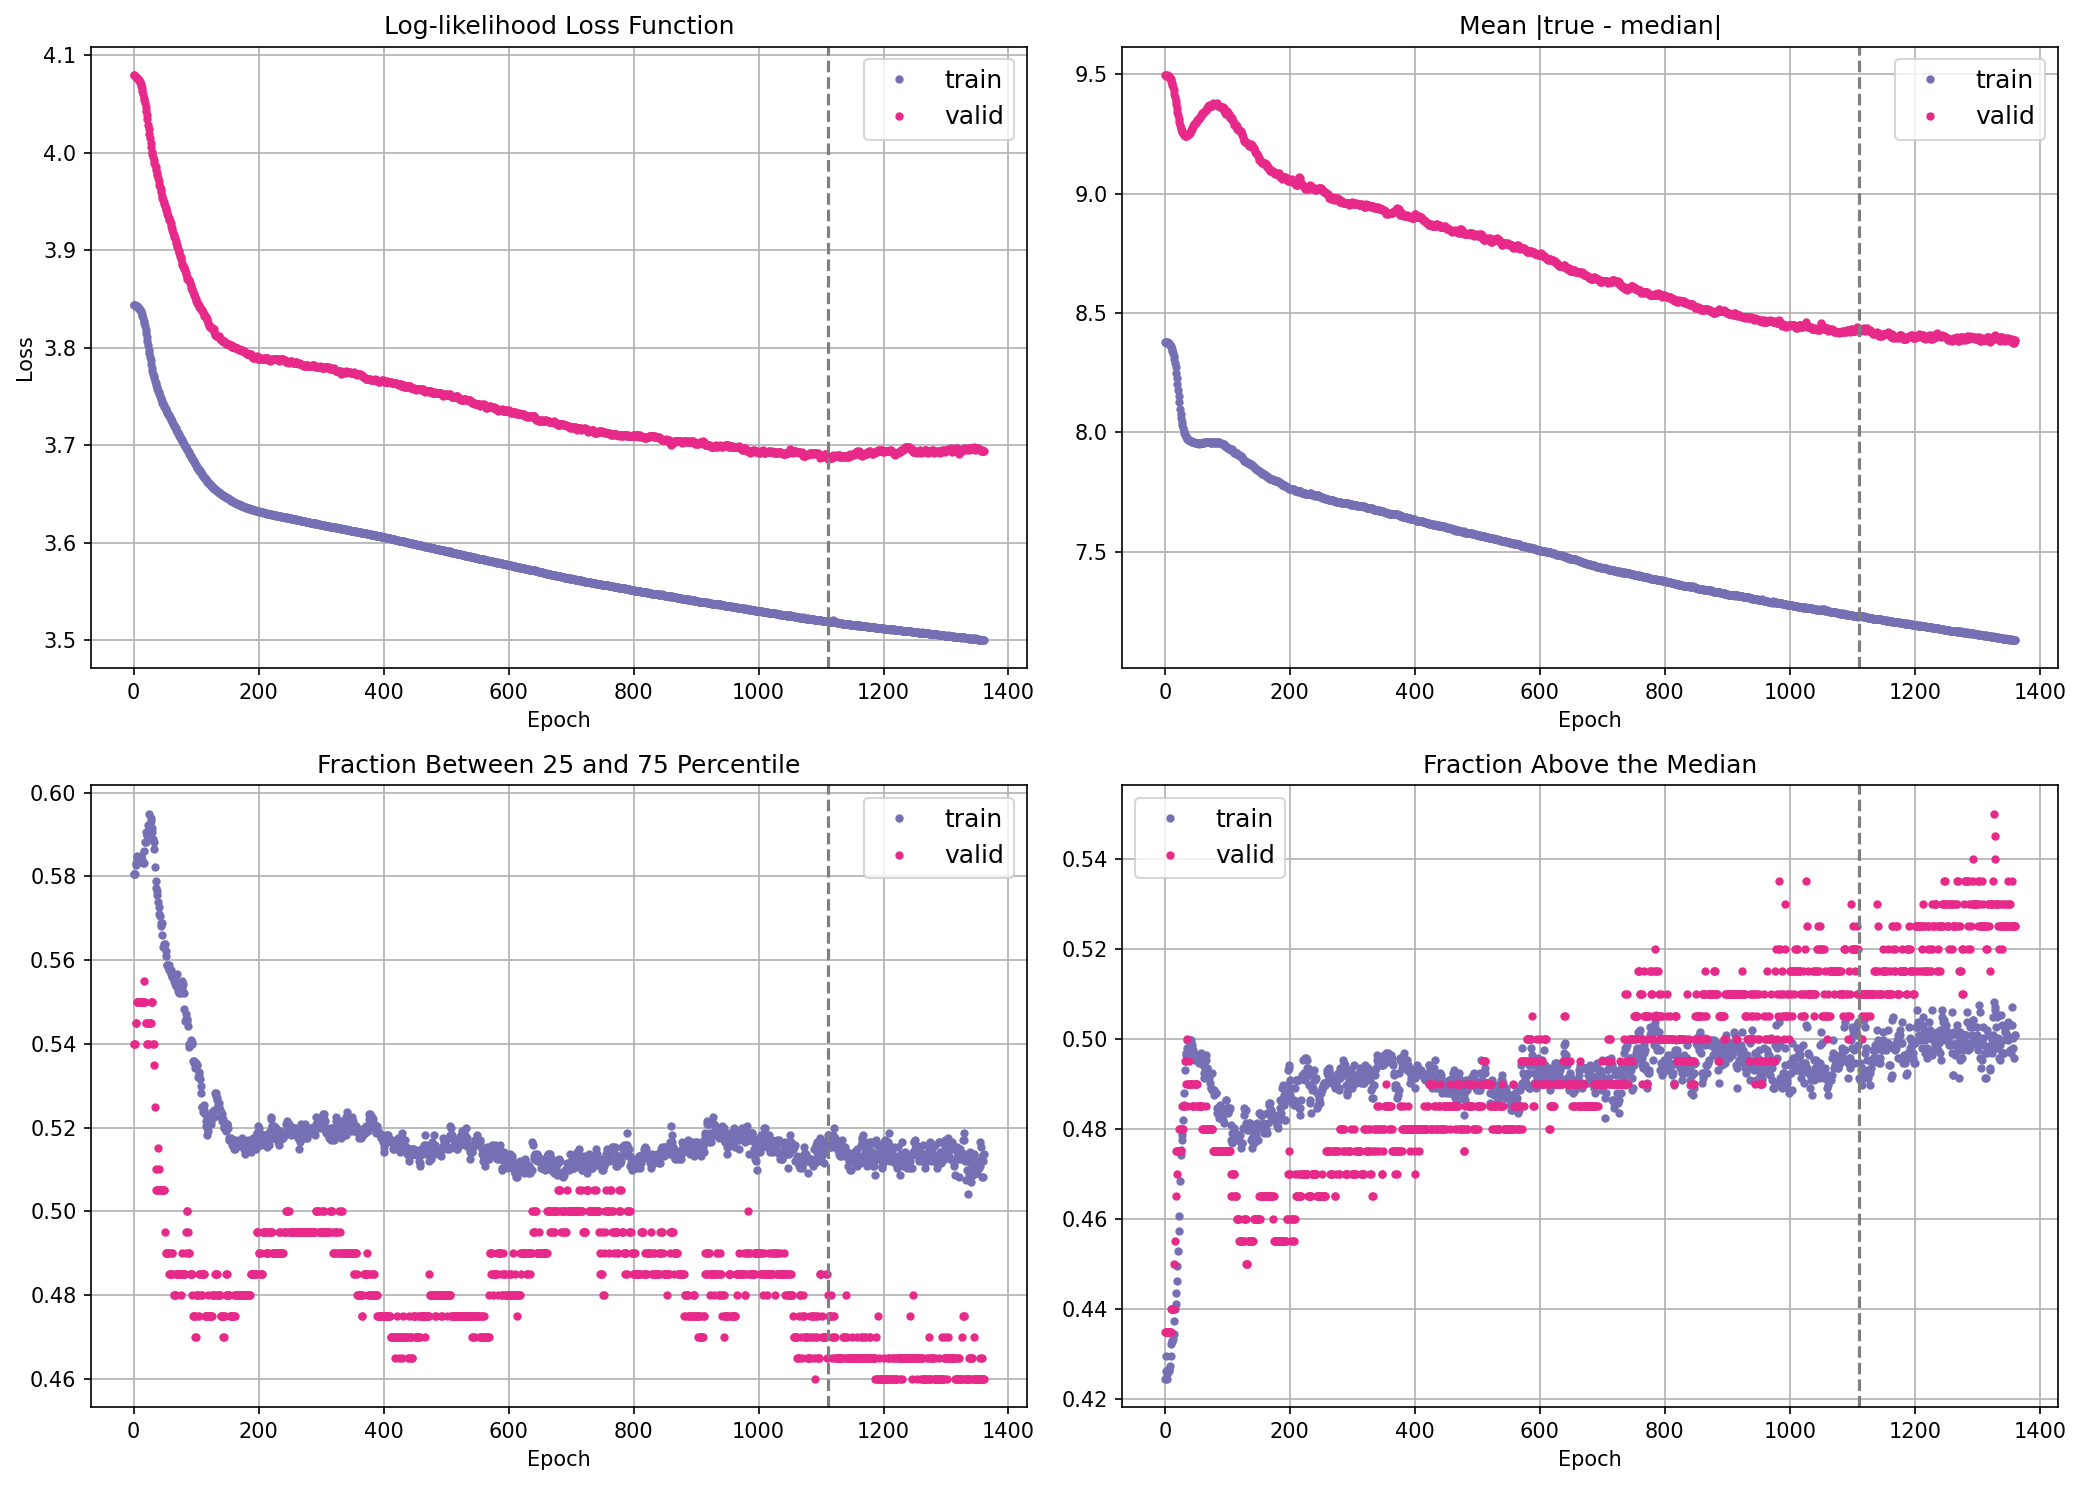

years(2021,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_16-Mar-2022_eab.dat',
 'onehot_test_shape': (308, 3),
 'onehot_train_shape': (1795, 3),
 'onehot_val_shape': (200, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (308, 11),
 'x_train_shape': (1795, 11),
 'x_val_shape': (200, 11),
 'y_name': ['OBDV']}
'intensity201_AL24_2021_shash3_network_seed_739_rng_seed_739'
Restoring model weights from the end of the best epoch: 487.
Epoch 00737: early stopping
{'best_epoch': 486,
 'elapsed_time': 42.45989108085632,
 'loss_train': 3.614544153213501,
 'loss_valid': 3.6416404247283936,
 'network_seed': 739}


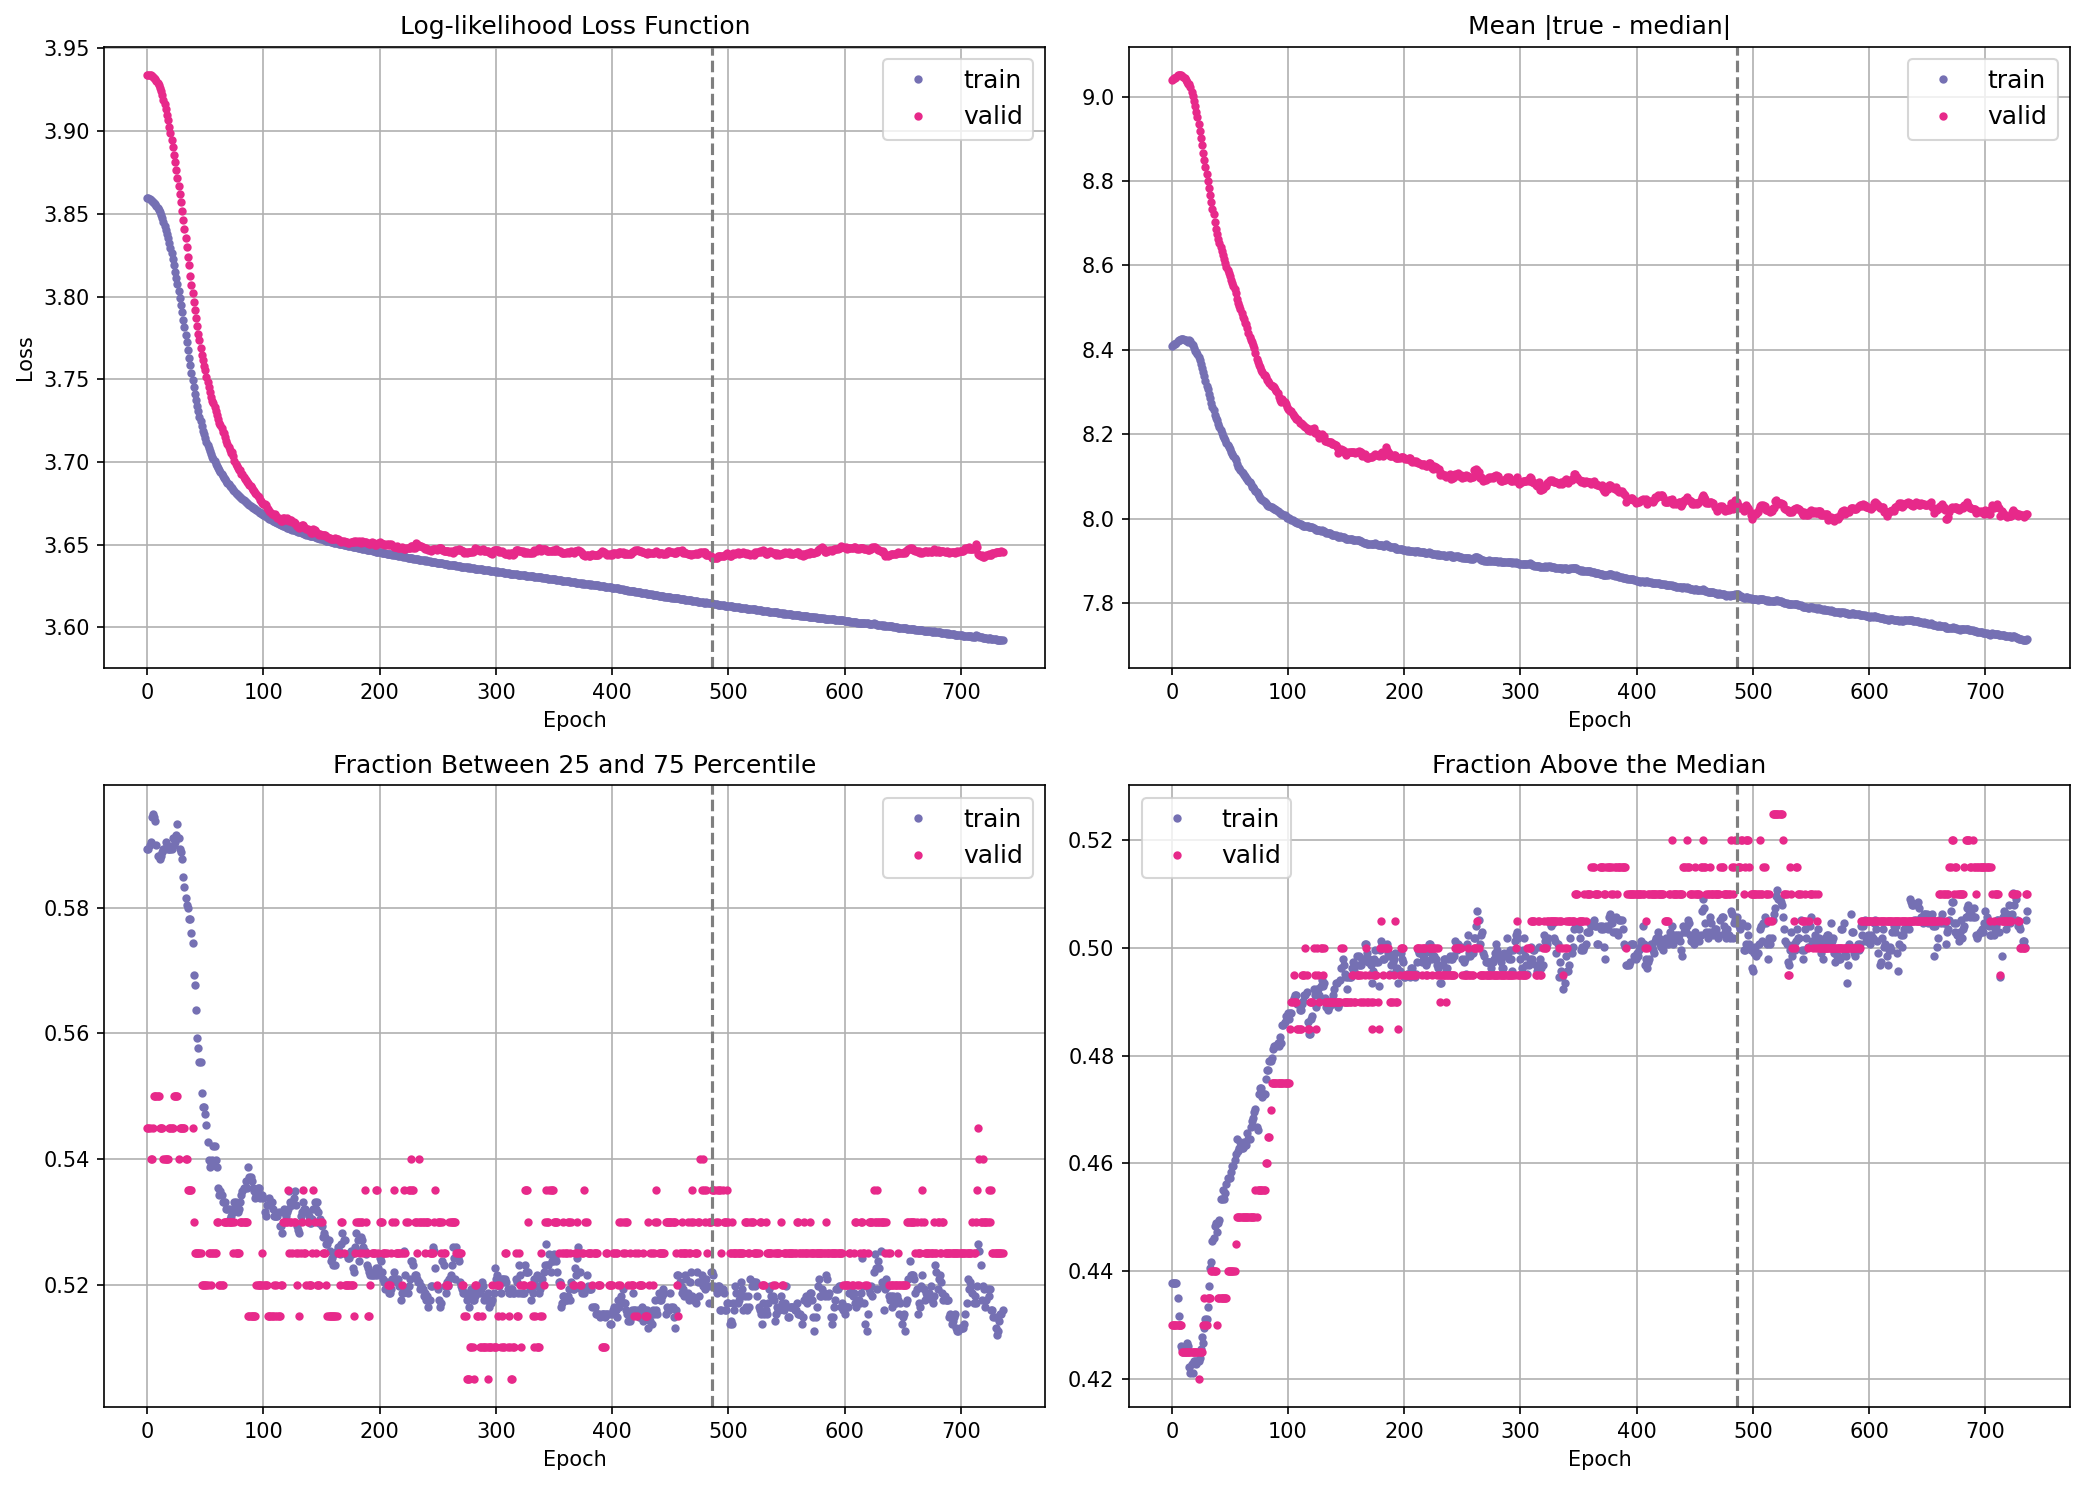

In [4]:
for exp_name in EXP_NAME_LIST:
    settings = experiment_settings.get_settings(exp_name)

    # set testing data
    if settings["test_condition"] == "leave-one-out":
        TESTING_YEARS_LIST = np.arange(2013,2022)
    elif settings["test_condition"] == "years":
        TESTING_YEARS_LIST = (np.copy(settings["years_test"]))
    else:
        raise NotImplementError('no such testing condition')

        
        
    for testing_years in TESTING_YEARS_LIST:        
        # set testing year
        settings["years_test"] = (testing_years,)
        
        
        for rng_seed in settings['rng_seed_list']:
            settings['rng_seed'] = rng_seed

            # build the intensity data tensors
            (
                data_summary,        
                x_train,
                onehot_train,
                x_val,
                onehot_val,
                x_test,
                onehot_test,        
                x_valtest,
                onehot_valtest,
                df_train,
                df_val,
                df_test,
                df_valtest,
            ) = build_hurricane_data(DATA_PATH, settings, verbose=1)

            # define the callbacks
            earlystoping_callback = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                mode="min",
                patience=settings["patience"],
                restore_best_weights=True,
                verbose=1,
            )

            training_callback = TrainingInstrumentation(
                x_train,
                onehot_train,
                interval=50,
            )

            callbacks = [earlystoping_callback, 
                         # training_callback,
                        ]

            # set network seed and train the model
            NETWORK_SEED_LIST = [settings["rng_seed"]]

            for network_seed in NETWORK_SEED_LIST:
                tf.random.set_seed(network_seed)  # This sets the global random seed.

                # Create the model name.
                model_name = (
                    exp_name + "_" + 
                    str(testing_years) + '_' +
                    settings["uncertainty_type"] + '_' + 
                    f"network_seed_{network_seed}_rng_seed_{settings['rng_seed']}"
                )
                pprint.pprint(model_name)

                # Make, compile, and train the model
                tf.keras.backend.clear_session()            
                model = build_model.make_model(
                    settings,
                    x_train,
                    onehot_train,
                    model_compile=True,
                )   
                # model.summary()

                # check if the model exists
                model_savename = MODEL_PATH + model_name + "_weights.h5"
                if os.path.exists(model_savename) and OVERWRITE_MODEL==False:
                    print(model_savename + 'exists. Skipping...')
                    continue

                # train the network
                start_time = time.time()
                history = model.fit(
                    x_train,
                    onehot_train,
                    validation_data=(x_val, onehot_val),
                    batch_size=settings["batch_size"],
                    epochs=settings["n_epochs"],
                    shuffle=True,
                    verbose=0,
                    callbacks=callbacks,
                )
                stop_time = time.time()

                # Display the results, and save the model rum.
                best_epoch = np.argmin(history.history["val_loss"])
                fit_summary = {
                    "network_seed": network_seed,
                    "elapsed_time": stop_time - start_time,
                    "best_epoch": best_epoch,
                    "loss_train": history.history["loss"][best_epoch],
                    "loss_valid": history.history["val_loss"][best_epoch],
                }
                pprint.pprint(fit_summary, width=80)
                plot_history(history, model_name)

                save_model_run(
                    data_summary,
                    fit_summary,
                    model,
                    MODEL_PATH,
                    model_name,
                    settings,
                    __version__,
                )

In [5]:
2+2

4